## <b><div style='padding:15px;background-color:#003f88;color:white;border-radius:2px;font-size:110%;text-align: left'>SUPERVISED MACHINE LEARNING GOALS</div></b>

**The major GOAL of every machine learning engineering task is to;**
- To prepare data to build machine learning models
- To build different machine learning models
- To evaluate model accuracy
- To identify the high and low performing models and Optimize the best performing model
- To productionalize or Report Best performing Model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter 

In [2]:
df = pd.read_csv(r"C:\Users\Abdulwahab\Desktop\Data Science Course\WEEK 11 Materials\LIVE CLASS\train_data.csv")
df.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [3]:
df.shape

(1058, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1058 non-null   int64 
 1   Attrition                 1058 non-null   int64 
 2   BusinessTravel            1058 non-null   object
 3   DailyRate                 1058 non-null   int64 
 4   Department                1058 non-null   object
 5   DistanceFromHome          1058 non-null   int64 
 6   Education                 1058 non-null   int64 
 7   EducationField            1058 non-null   object
 8   EmployeeCount             1058 non-null   int64 
 9   EmployeeNumber            1058 non-null   int64 
 10  EnvironmentSatisfaction   1058 non-null   int64 
 11  Gender                    1058 non-null   object
 12  HourlyRate                1058 non-null   int64 
 13  JobInvolvement            1058 non-null   int64 
 14  JobLevel                

In [6]:
# Statistical analysis of numerical features (To transcribe)
df.describe().T

count          mean          std     min      25%  \
Age                       1058.0     37.055766     9.410421    18.0    30.00   
Attrition                 1058.0      0.169187     0.375094     0.0     0.00   
DailyRate                 1058.0    809.542533   408.478049   102.0   465.25   
DistanceFromHome          1058.0      8.978261     8.040608     1.0     2.00   
Education                 1058.0      2.879017     1.031442     1.0     2.00   
EmployeeCount             1058.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1058.0    731.753308   431.418209     1.0   364.50   
EnvironmentSatisfaction   1058.0      2.712665     1.092959     1.0     2.00   
HourlyRate                1058.0     65.643667    20.324861    30.0    48.00   
JobInvolvement            1058.0      2.737240     0.704730     1.0     2.00   
JobLevel                  1058.0      2.090737     1.136514     1.0     1.00   
JobSatisfaction           1058.0      2.749527     1.104144     1.0     2.00   
MonthlyIncome             1058.0   6625.945180  4837.695042  1009.0  2900.25   
MonthlyRate               1058.0  14267.281664  7048.077305  2094.0  8277.25   
NumCompaniesWorked        1058.0      2.706994     2.523526     0.0     1.00   
PercentSalaryHike         1058.0     15.155955     3.641097    11.0    12.00   
PerformanceRating         1058.0      3.150284     0.357518     3.0     3.00   
RelationshipSatisfaction  1058.0      2.726843     1.090970     1.0     2.00   
StandardHours             1058.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1058.0      0.762760     0.837537     0.0     0.00   
TotalWorkingYears         1058.0     11.435728     8.016429     0.0     6.00   
TrainingTimesLastYear     1058.0      2.769376     1.302689     0.0     2.00   
WorkLifeBalance           1058.0      2.763705     0.707392     1.0     2.00   
YearsAtCompany            1058.0      7.065217     6.265227     0.0     3.00   
YearsInCurrentRole        1058.0      4.260870     3.617470     0.0     2.00   
YearsSinceLastPromotion   1058.0      2.203214     3.266948     0.0     0.00   
YearsWithCurrManager      1058.0      4.142722     3.599044     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
Attrition                     0.0      0.00      1.0  
DailyRate                   817.5   1168.50   1499.0  
DistanceFromHome              7.0     13.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber              723.5   1101.75   1487.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   65.0     83.00    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4903.5   8736.50  19999.0  
MonthlyRate               14201.0  20364.00  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     16.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [7]:
df.describe(exclude=['int64', 'float64'])

BusinessTravel              Department EducationField Gender  \
count            1058                    1058           1058   1058   
unique              3                       3              6      2   
top     Travel_Rarely  Research & Development  Life Sciences   Male   
freq              746                     701            436    620   

                JobRole MaritalStatus Over18 OverTime  
count              1058          1058   1058     1058  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                232           464   1058      751

In [8]:
# Descriptive Statistical analysis of numerical features
df.describe(include = ['bool','object'])

BusinessTravel              Department EducationField Gender  \
count            1058                    1058           1058   1058   
unique              3                       3              6      2   
top     Travel_Rarely  Research & Development  Life Sciences   Male   
freq              746                     701            436    620   

                JobRole MaritalStatus Over18 OverTime  
count              1058          1058   1058     1058  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                232           464   1058      751

##### REGRESSION ANALYSIS
for Regression problems, the goal is to forecast/ predict a continous output, the key differences here are in the type of models we import,
as opposed to a binary or a multi binary output as with the case with classification cases

In [9]:
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [10]:
# To group Customers_Age

def age_group(x):
    if x <= 32:
        return "<=32 (Young Adults)"
    elif x <= 47:
        return "33 - 47 (Adults)"
    else:
        return ">=48 (Elders)"

# Apply function to the data

df['age_group'] = df['Age'].apply(age_group)

In [11]:
# Category of Attrition

def Attribution_cat(x):
    if x == 0:
        return 'No'
    else:
        return 'Yes'

# Apply function to the data

df['Attribution_cat'] = df['Attrition'].apply(Attribution_cat)

In [12]:
# Category of Education

def Education_level(x):
    if x == 1:
        return 'High School Diploma'
    elif x == 2:
        return 'Associate Degree(HND)'
    elif x == 3:
        return 'Bsc'
    elif x == 4:
        return 'Masters'
    else:
        return 'PhD'

# Apply function to the data

df['Education_level'] = df['Education'].apply(Education_level)

In [13]:
# Category of EnvironmentSatisfaction

def Environsatisfaction_cat(x):
    if x == 1:
        return 'Highly Dissatisfied'
    elif x == 2:
        return 'Dissatisfied'
    elif x == 3:
        return 'Highly Satisfied'
    else:
        return 'Satisfied'

# Apply function to the data

df['Environsatisfaction_cat'] = df['EnvironmentSatisfaction'].apply(Environsatisfaction_cat)

In [14]:
# Category of JobInvolvement

def JobInvolvement_cat(x):
    if x == 1:
        return 'Disengagement'
    elif x == 2:
        return 'Low Involvement'
    elif x == 3:
        return 'Moderate Involvement'
    else:
        return 'High Involvement'

# Apply function to the data

df['JobInvolvement_cat'] = df['JobInvolvement'].apply(JobInvolvement_cat)

In [15]:
# Category of JobLevel

def JobLevel_cat(x):
    if x == 1:
        return 'Entry-Level'
    elif x == 2:
        return 'Junior Level'
    elif x == 3:
        return 'Mid-Level'
    elif x == 4:
        return 'Senior Level'
    else:
        return 'Executive'

# Apply function to the data

df['JobLevel_cat'] = df['JobLevel'].apply(JobLevel_cat)

In [16]:
# Category of PerformanceRating

def PerformanceRating_cat(x):
    if x == 3:
        return 'Low Performance'
    else:
        return 'High Performance'

# Apply function to the data

df['PerformanceRating_cat'] = df['PerformanceRating'].apply(PerformanceRating_cat)

In [17]:
# Category of RelationshipSatisfaction

def RelationshipSatisfaction_cat(x):
    if x == 1:
        return 'Very Dissatisfied'
    elif x == 2:
        return 'Dissatisfied'
    elif x == 3:
        return 'Satisfied'
    else:
        return 'Very Satisfied'

# Apply function to the data

df['RelationshipSatisfaction_cat'] = df['RelationshipSatisfaction'].apply(RelationshipSatisfaction_cat)

In [18]:
# Category of StockOptionLevel

def StockOptionLevel_cat(x):
    if x == 0:
        return 'Junior/Entry-Level employees'
    elif x == 1:
        return 'Mid-Level employees'
    elif x == 2:
        return 'Senior Level employeess'
    else:
        return 'Executives'

# Apply function to the data

df['StockOptionLevel_cat'] = df['StockOptionLevel'].apply(StockOptionLevel_cat)

In [19]:
# Category of JobSatisfaction

def JobSatisfaction_cat(x):
    if x == 1:
        return 'Very Dissatisfied'
    elif x == 2:
        return 'Dissatisfied'
    elif x == 3:
        return 'Satisfied'
    else:
        return 'Very Satisfied'

# Apply function to the data

df['JobSatisfaction_cat'] = df['JobSatisfaction'].apply(JobSatisfaction_cat)

In [20]:
# Category of WorkLifeBalance

def WorkLifeBalance_cat(x):
    if x == 1:
        return 'Poor'
    elif x == 2:
        return 'Fair'
    elif x == 3:
        return 'Good'
    else:
        return 'Excellent'

# Apply function to the data

df['WorkLifeBalance_cat'] = df['WorkLifeBalance'].apply(WorkLifeBalance_cat)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1058 non-null   int64 
 1   Attrition                     1058 non-null   int64 
 2   BusinessTravel                1058 non-null   object
 3   DailyRate                     1058 non-null   int64 
 4   Department                    1058 non-null   object
 5   DistanceFromHome              1058 non-null   int64 
 6   Education                     1058 non-null   int64 
 7   EducationField                1058 non-null   object
 8   EmployeeCount                 1058 non-null   int64 
 9   EmployeeNumber                1058 non-null   int64 
 10  EnvironmentSatisfaction       1058 non-null   int64 
 11  Gender                        1058 non-null   object
 12  HourlyRate                    1058 non-null   int64 
 13  JobInvolvement    

## Univariate Analysis

### Group 1.1 : Customer Bio-Data :
#### Gender | age_group | MaritalStatus | 

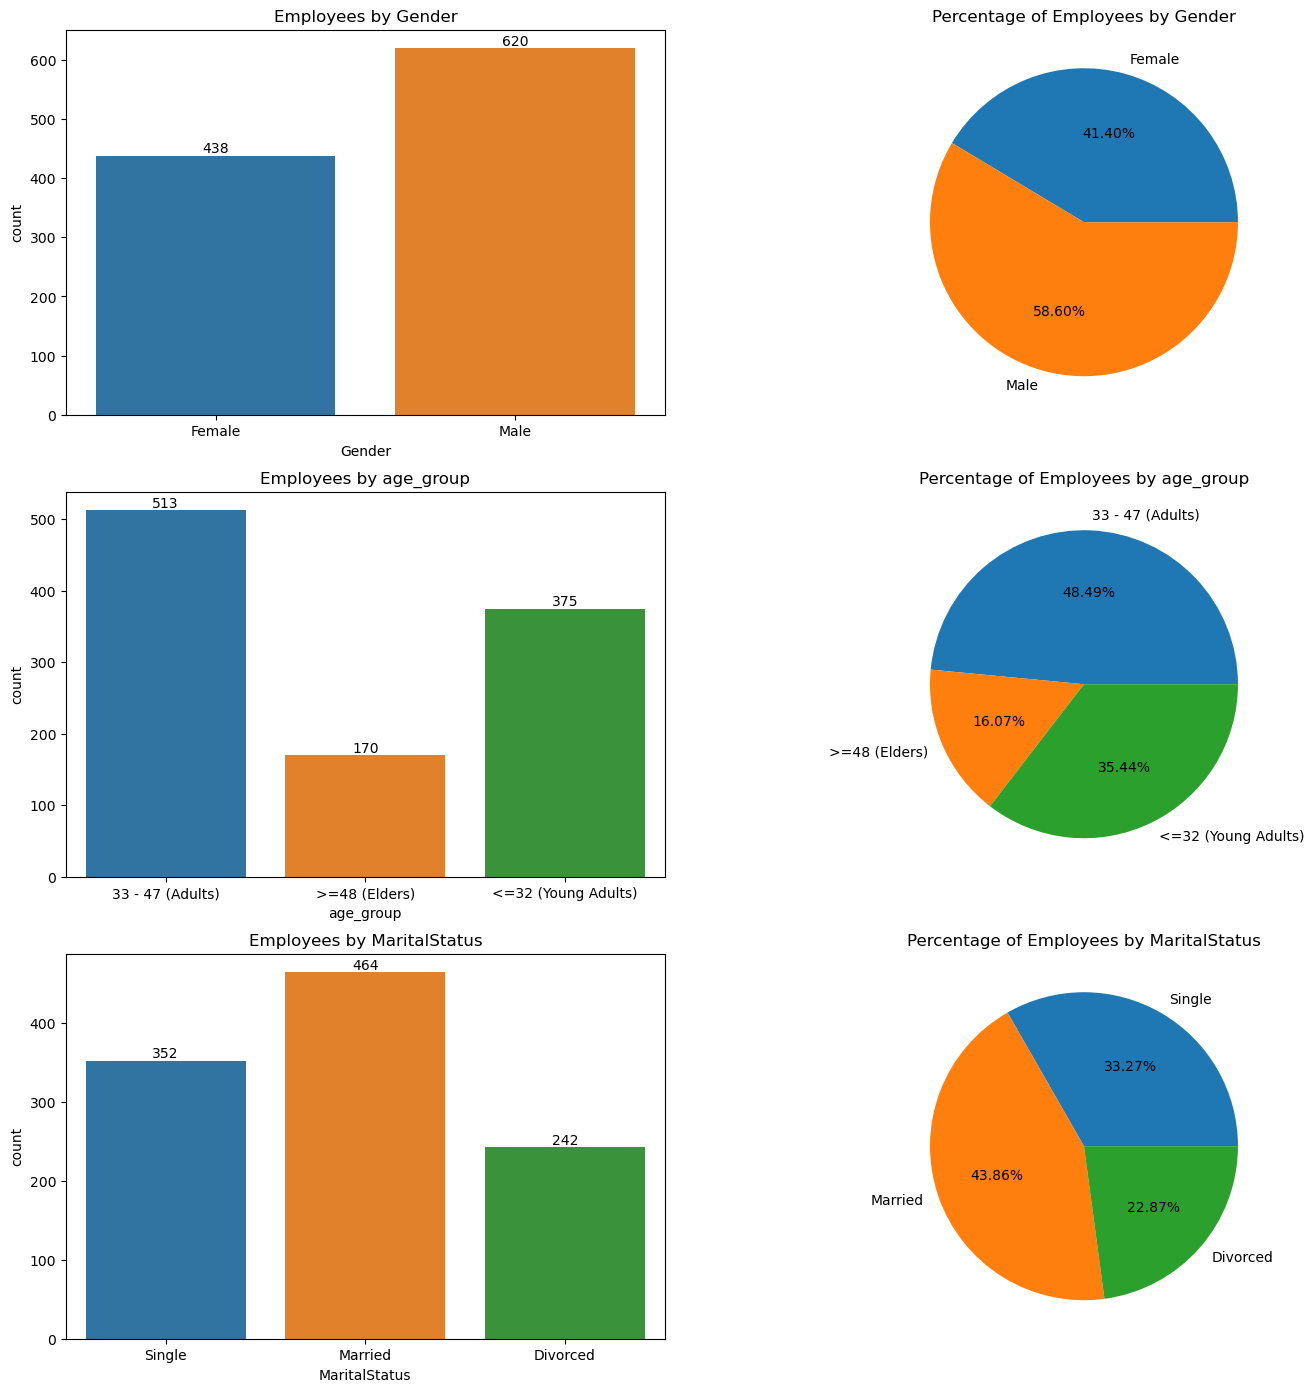

In [22]:
fig, axs = plt.subplots(3,2, figsize = (17,17))

ax = sns.countplot(x = df['Gender'], ax = axs[0,0])
ax.bar_label(ax.containers[0])
axs[0,0].set_title('Employees by Gender')

count = Counter(df['Gender'])
axs[0,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[0,1].set_title('Percentage of Employees by Gender')

ax = sns.countplot(x = df['age_group'], ax = axs[1,0])
ax.bar_label(ax.containers[0])
axs[1,0].set_title('Employees by age_group')

count = Counter(df['age_group'])
axs[1,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[1,1].set_title('Percentage of Employees by age_group')

ax = sns.countplot(x = df['MaritalStatus'], ax = axs[2,0])
ax.bar_label(ax.containers[0])
axs[2,0].set_title('Employees by MaritalStatus')

count = Counter(df['MaritalStatus'])
axs[2,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[2,1].set_title('Percentage of Employees by MaritalStatus')

plt.tight_layout;

##### **Observations**
- 58.60% of the employees are male while 41.40% are females.
- 48.49% of the etire workforce falls within the age age bracket(33-47), 35.44% are 32 below, while 16.07% are 48 above.
- 43.86% are married, 33.27% are single while 22.87% are divorced

##### Group 1.2 : Customer Bio-Data :
#### EducationField | Education | Department |

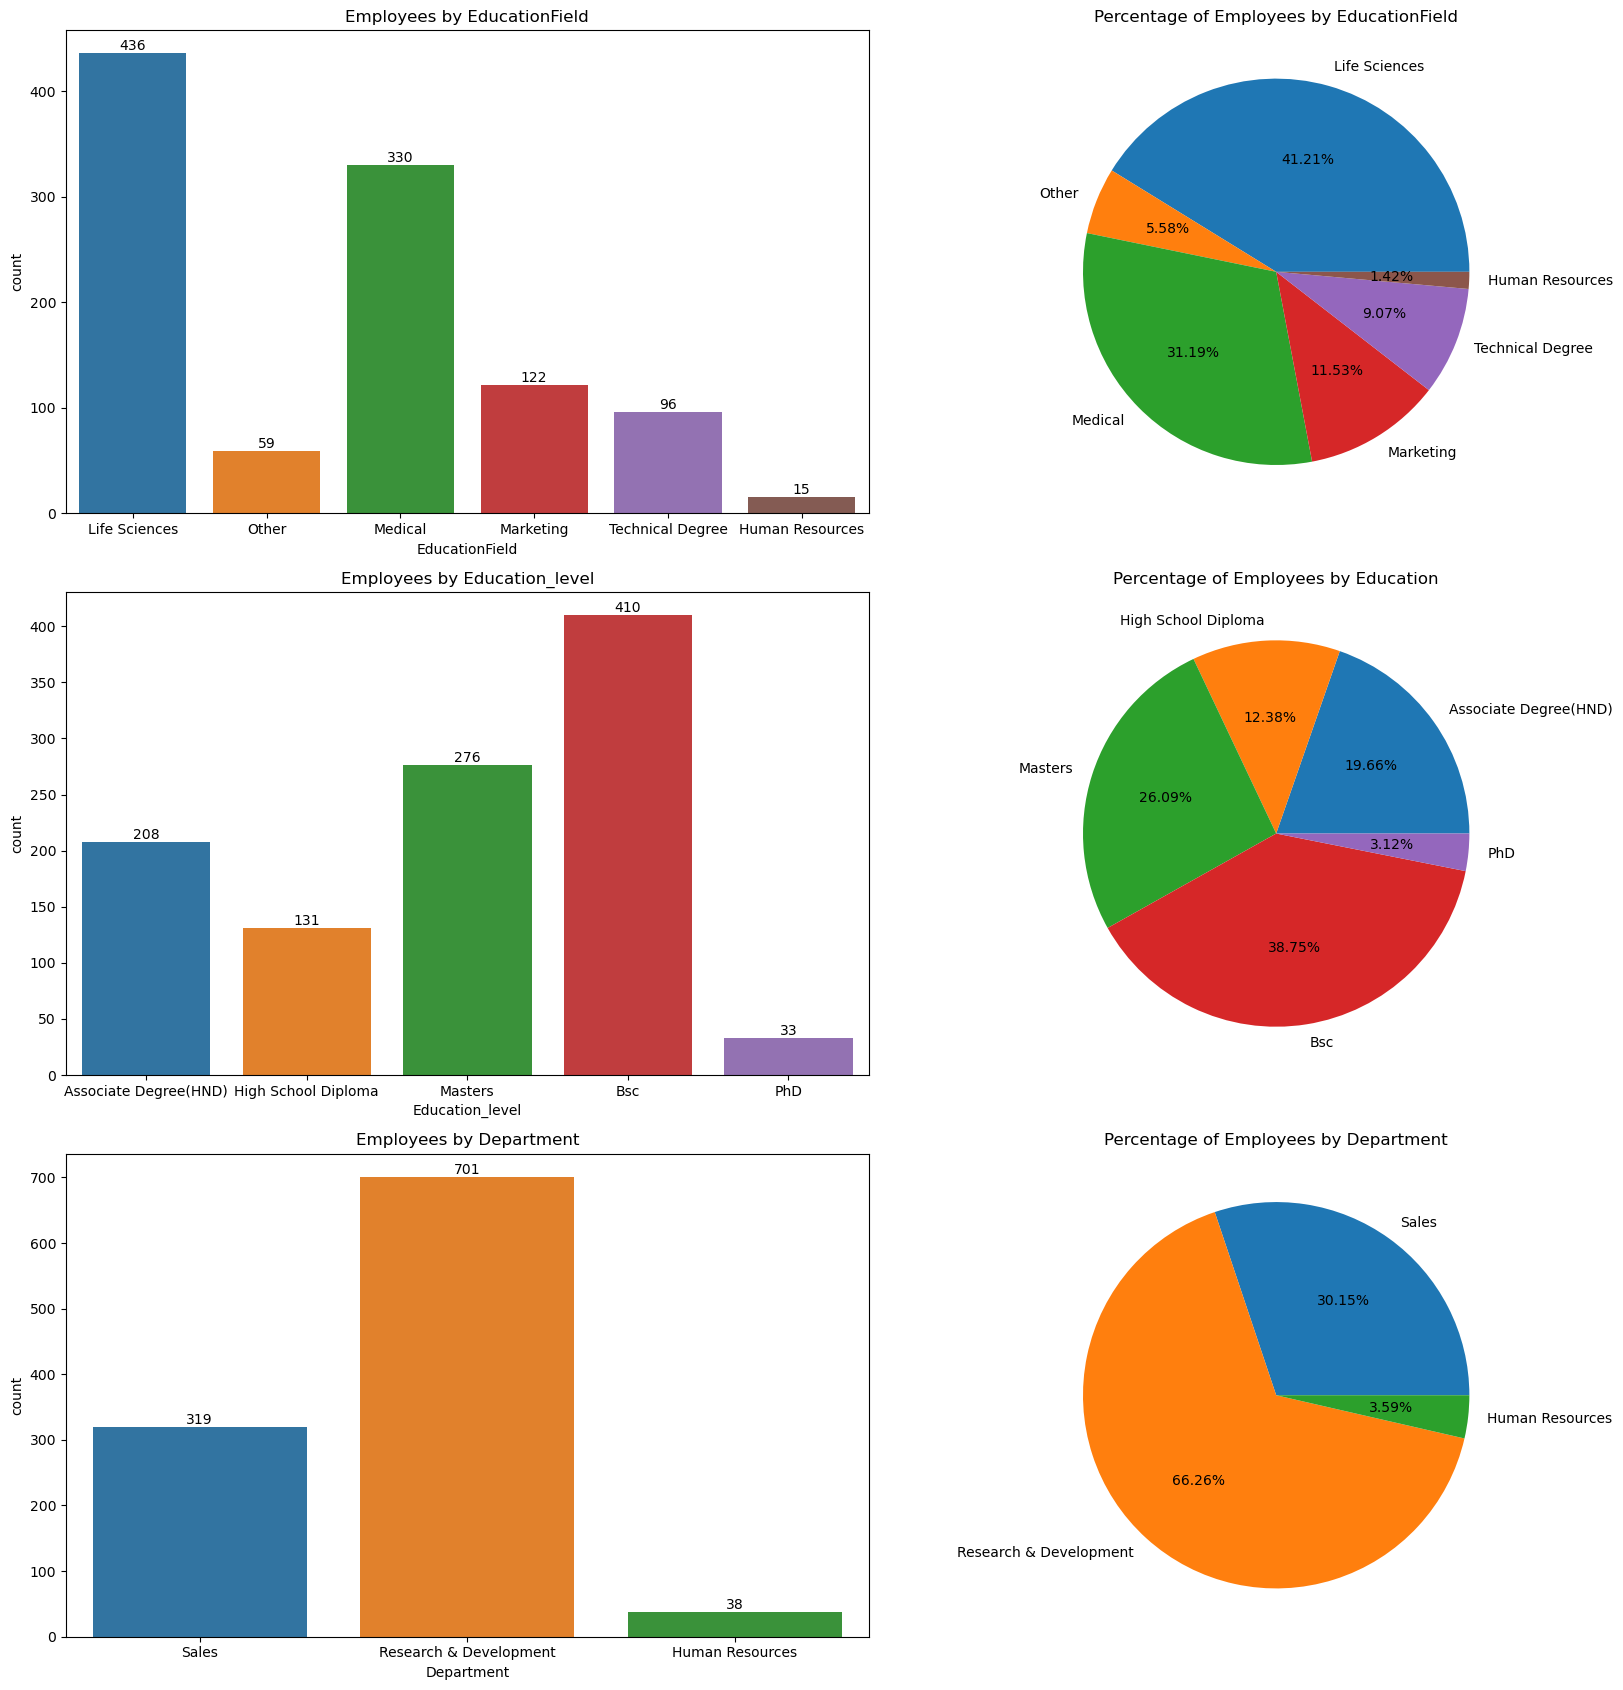

In [23]:
fig, axs = plt.subplots(3,2, figsize = (17,17))

ax = sns.countplot(x = df['EducationField'], ax = axs[0,0])
ax.bar_label(ax.containers[0])
axs[0,0].set_title('Employees by EducationField')

count = Counter(df['EducationField'])
axs[0,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[0,1].set_title('Percentage of Employees by EducationField')

ax = sns.countplot(x = df['Education_level'], ax = axs[1,0])
ax.bar_label(ax.containers[0])
axs[1,0].set_title('Employees by Education_level')

count = Counter(df['Education_level'])
axs[1,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[1,1].set_title('Percentage of Employees by Education')

ax = sns.countplot(x = df['Department'], ax = axs[2,0])
ax.bar_label(ax.containers[0])
axs[2,0].set_title('Employees by Department')

count = Counter(df['Department'])
axs[2,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[2,1].set_title('Percentage of Employees by Department')

plt.tight_layout();

##### **Observations**
- 41.21% of employees have background in Life Sciences, 31.19% in Medical, 11.53% in Marketing, 9.07% in Technical degree, 5.58% in other and 1.42% in Human Resources.
- 38.75% of the employees have Bsc, 26.09% holds a Masters Degree, 19.66% have OND/HND, 12.38% have High school diploma and 3.12% have PhD.
- Majority of the staffs studied Researh and Development with 66.26%, followed by Sales with 30.15% and Humnan Resources with 3.59%

##### Group 2.1 : Employment info
#### JobRole | JobLevel | JobInvolvement | JobSatisfaction

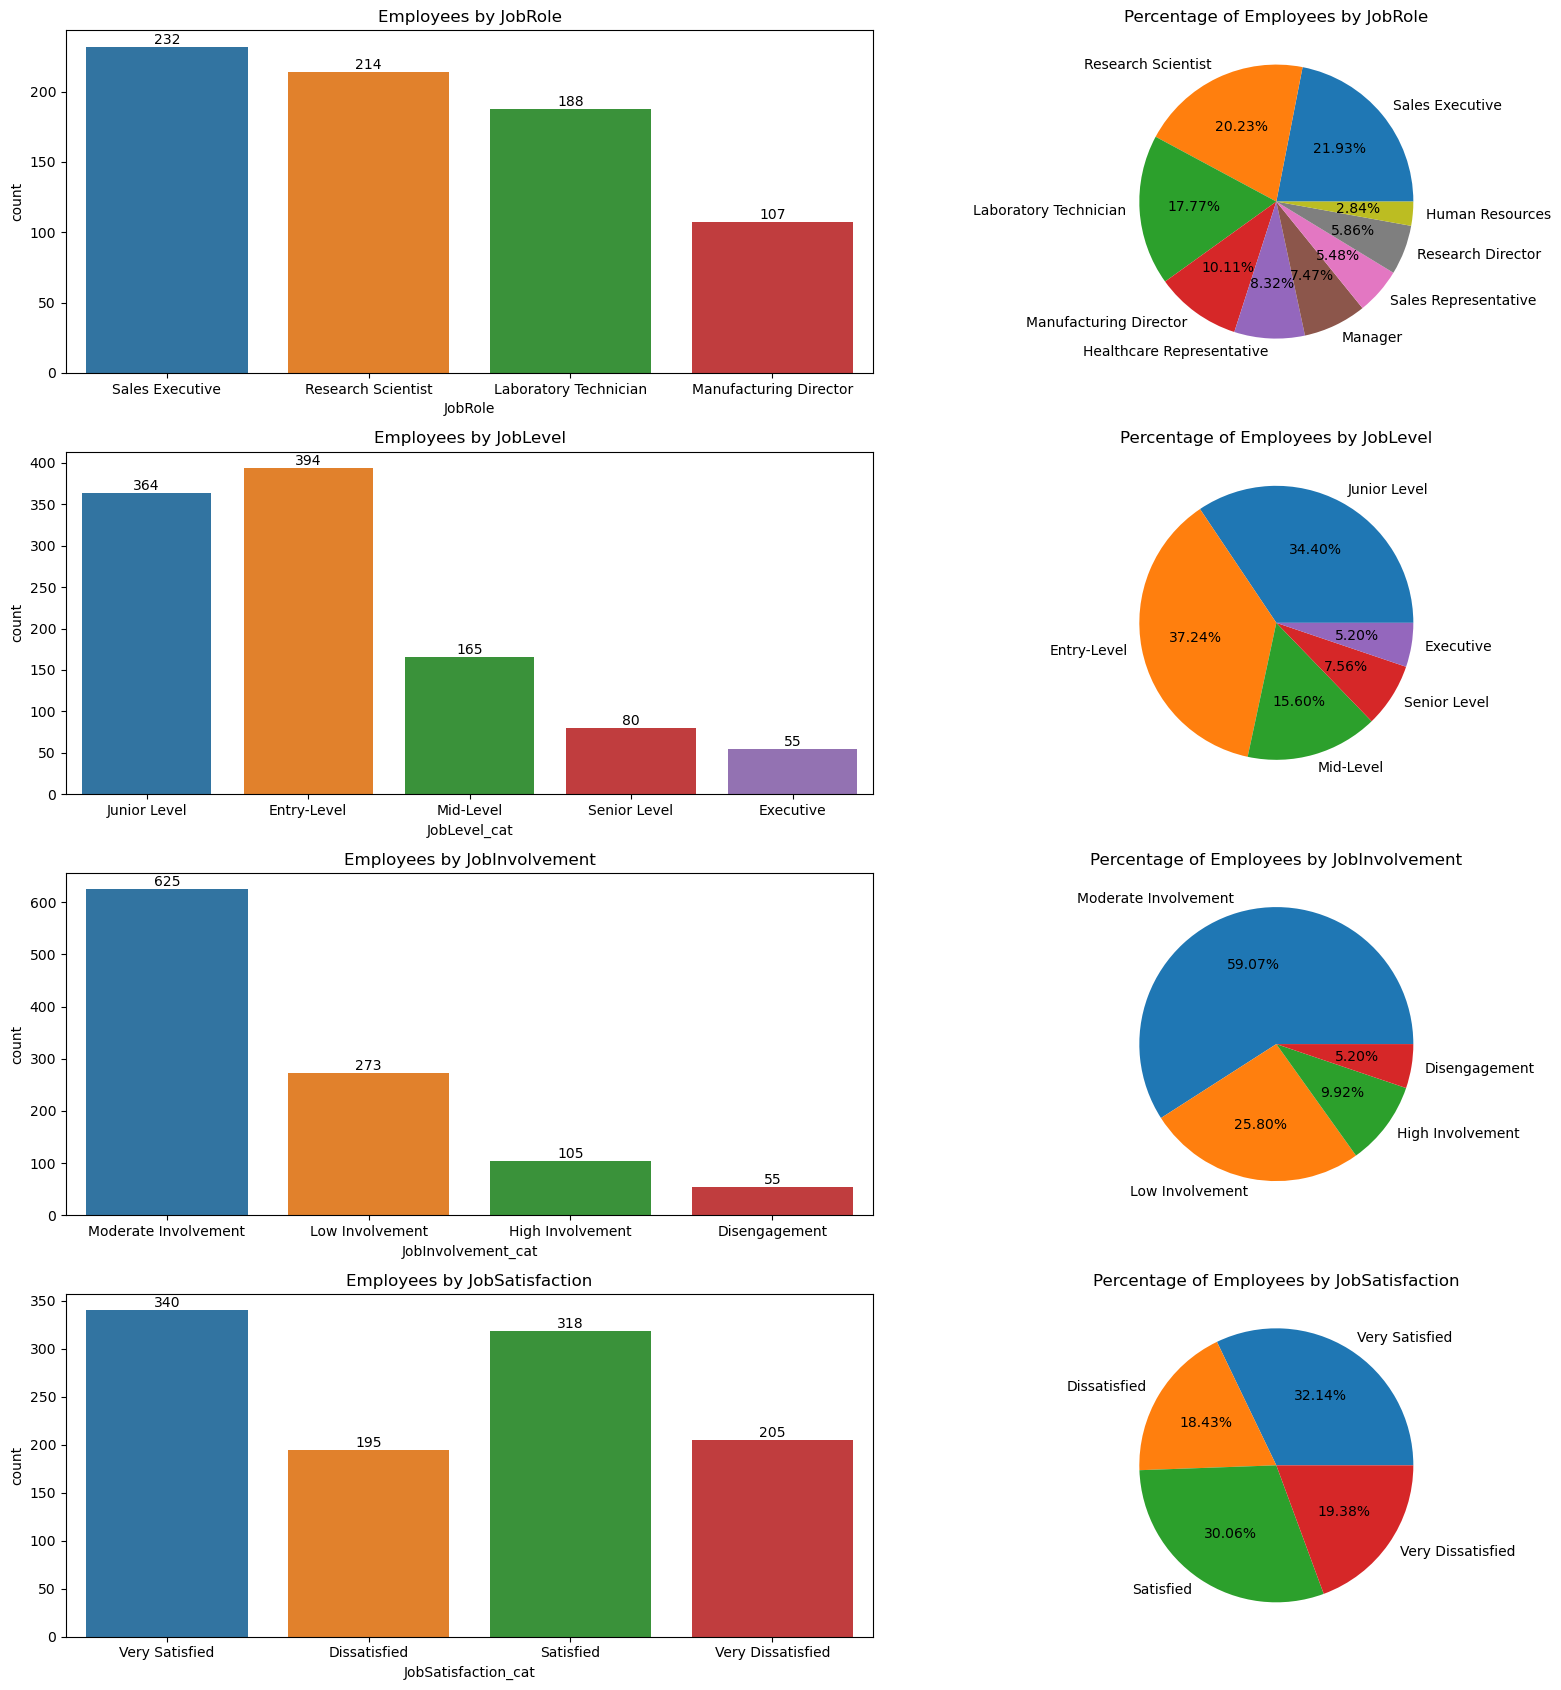

In [24]:
fig, axs = plt.subplots(4,2, figsize = (17,17))

topfour = df['JobRole'].value_counts().head(4)
ax = sns.countplot(x = df['JobRole'], ax = axs[0,0], order = topfour.index)
ax.bar_label(ax.containers[0])
axs[0,0].set_title('Employees by JobRole');

count = Counter(df['JobRole'])
axs[0,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[0,1].set_title('Percentage of Employees by JobRole')

ax = sns.countplot(x = df['JobLevel_cat'], ax = axs[1,0])
ax.bar_label(ax.containers[0])
axs[1,0].set_title('Employees by JobLevel')

count = Counter(df['JobLevel_cat'])
axs[1,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[1,1].set_title('Percentage of Employees by JobLevel')

ax = sns.countplot(x = df['JobInvolvement_cat'], ax = axs[2,0])
ax.bar_label(ax.containers[0])
axs[2,0].set_title('Employees by JobInvolvement')

count = Counter(df['JobInvolvement_cat'])
axs[2,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[2,1].set_title('Percentage of Employees by JobInvolvement')

ax = sns.countplot(x = df['JobSatisfaction_cat'], ax = axs[3,0])
ax.bar_label(ax.containers[0])
axs[3,0].set_title('Employees by JobSatisfaction')

count = Counter(df['JobSatisfaction_cat'])
axs[3,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[3,1].set_title('Percentage of Employees by JobSatisfaction')

plt.tight_layout();

##### **Observations**
- 21.93% works as Sales Executive, 20.23% as Research Scientist, 17.77% are Loboratory Technicians, 10.11% are Manufacturing Directors, 8.32 as Healthcare Representatives, 7.47% are Managers, 5.86% are Research Directors, 5.48% are Sales Representatives, and 2.48% as Human Resource Personnel.
- 37.24% are Entry_level, 34.40% are Junior Staff, 15.60 are Mid-level, 7.56% are Senior level  and 5.20% are Executives.
- 59.07% are Moderately involved in their jobs, 25.80 have low involvement, 9.92% are highly involved in their jobs while 5.20% are totally disengaged.
- 32.14% are very satisfied with their Job, 30.06% are satisfied, 18.43% are Dissatisvied while 19.38% are very dissatisfied.

##### Group 2.2 : Employment info
#### WorkLifeBalance | Environsatisfaction | BusinessTravel | OverTime

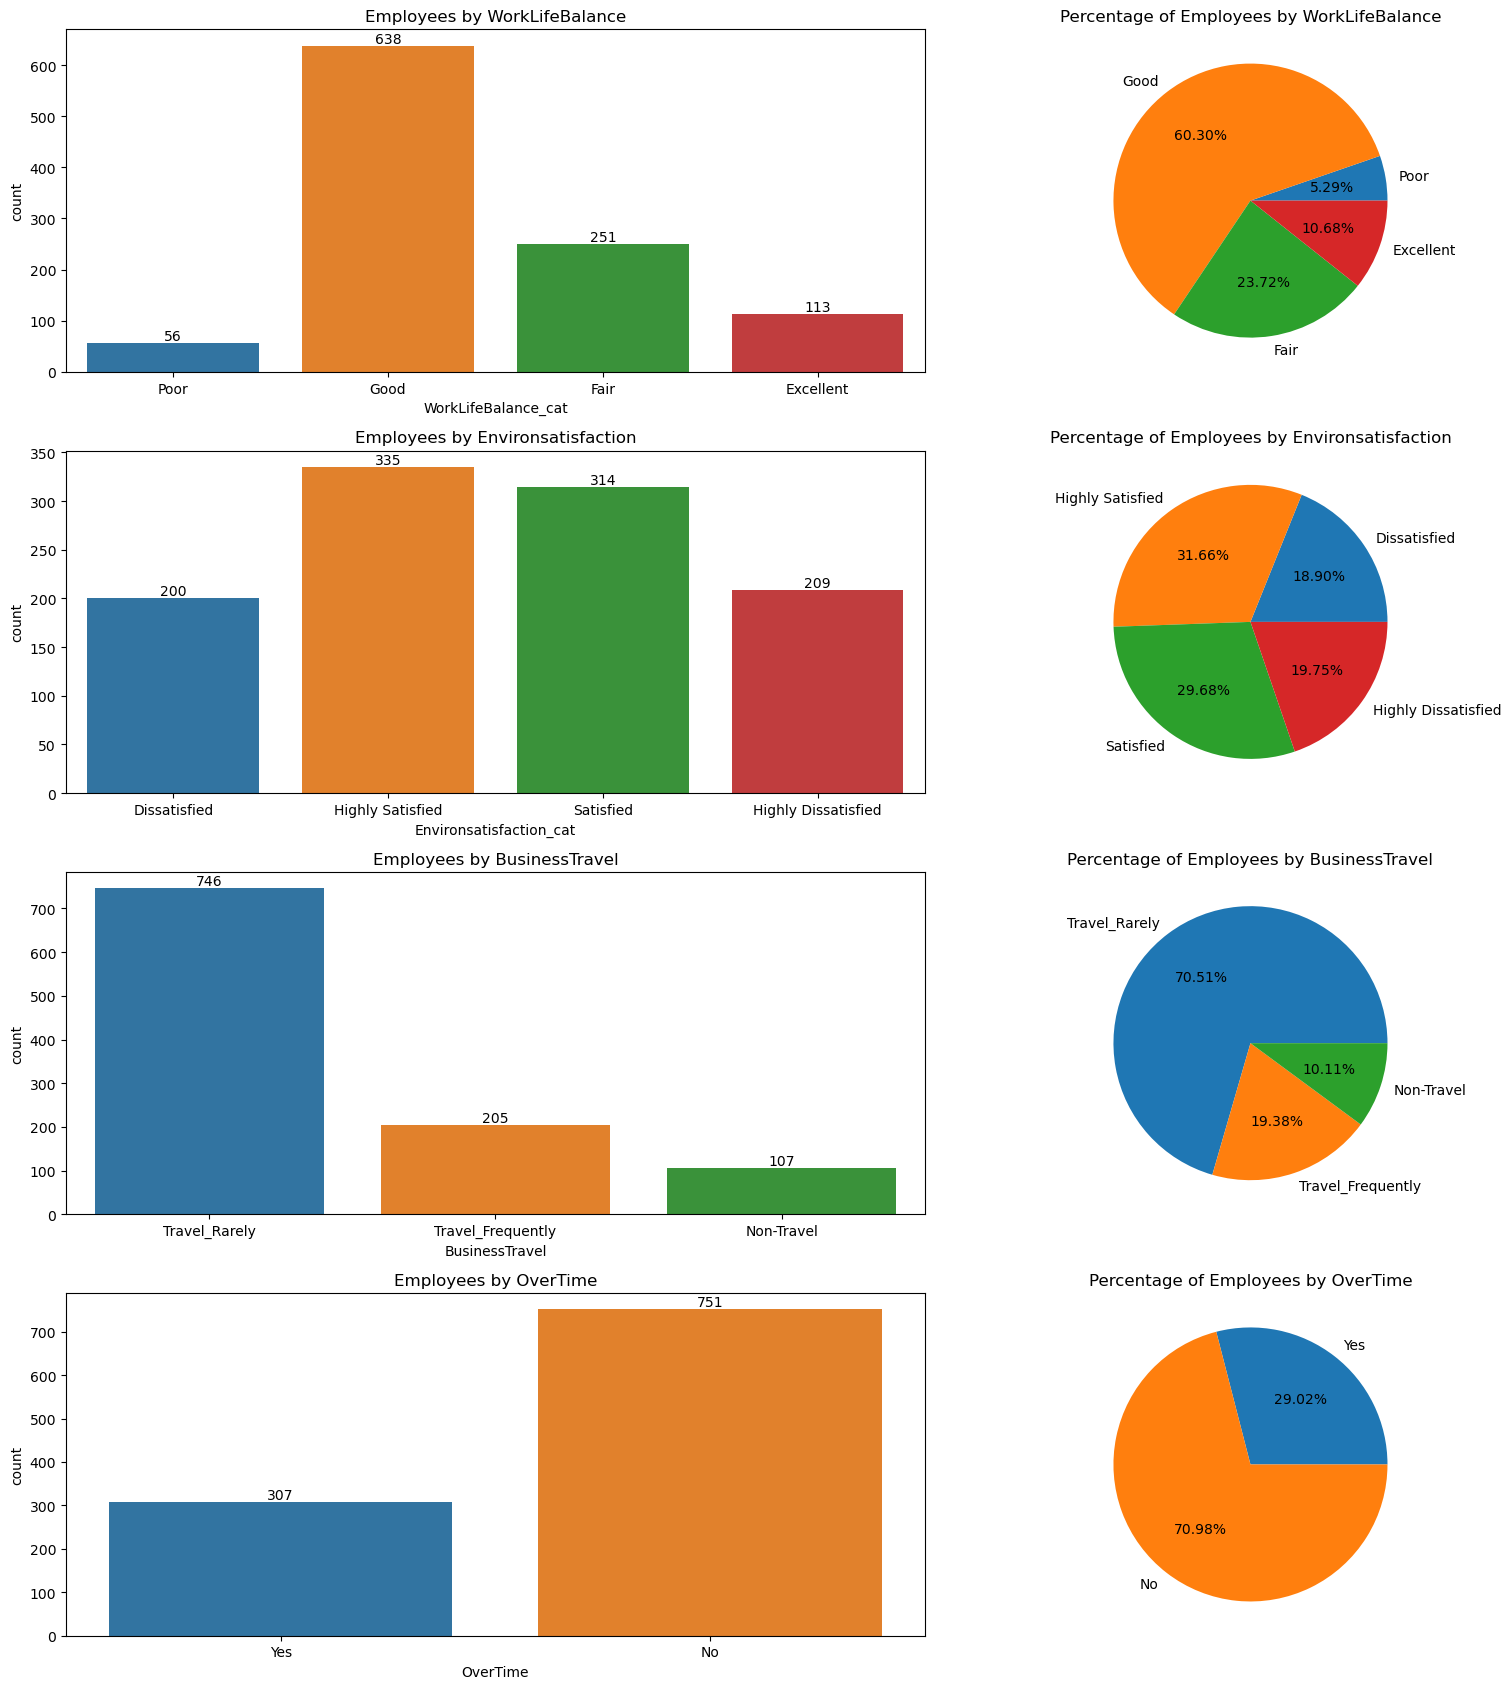

In [25]:
fig, axs = plt.subplots(4,2, figsize = (17,17))

ax = sns.countplot(x = df['WorkLifeBalance_cat'], ax = axs[0,0])
ax.bar_label(ax.containers[0])
axs[0,0].set_title('Employees by WorkLifeBalance');

count = Counter(df['WorkLifeBalance_cat'])
axs[0,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[0,1].set_title('Percentage of Employees by WorkLifeBalance')

ax = sns.countplot(x = df['Environsatisfaction_cat'], ax = axs[1,0])
ax.bar_label(ax.containers[0])
axs[1,0].set_title('Employees by Environsatisfaction')

count = Counter(df['Environsatisfaction_cat'])
axs[1,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[1,1].set_title('Percentage of Employees by Environsatisfaction')

ax = sns.countplot(x = df['BusinessTravel'], ax = axs[2,0])
ax.bar_label(ax.containers[0])
axs[2,0].set_title('Employees by BusinessTravel')

count = Counter(df['BusinessTravel'])
axs[2,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[2,1].set_title('Percentage of Employees by BusinessTravel')

ax = sns.countplot(x = df['OverTime'], ax = axs[3,0])
ax.bar_label(ax.containers[0])
axs[3,0].set_title('Employees by OverTime')

count = Counter(df['OverTime'])
axs[3,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[3,1].set_title('Percentage of Employees by OverTime')

plt.tight_layout();

##### **Observations**
- Majority of the staffs have a good WorkLifeBalance with about 60.30%, 23.72% have a fair WorkLifeBalance, 10.68% have an Excellent WorkLifeBalance while 5.29% have a poor WorkLifeBalance.
- Interms of Environment Satisfaction 31.66% are Highly Satisfied, 29.68% are Satisfied, while 18.90% are Dissatisfied, 19.75% are Highly Dissatisfied.
- Majority of the staffs Rarely Travels which is about 70.51%, 19.38% Travel frequently while 10.11% do not travel.
- 70.98% of Staffs do not work overtime while 29.02% do overtime.

##### Group 2.3 : Employment info
#### PerformanceRating | RelationshipSatisfaction | StockOptionLevel | Attrition

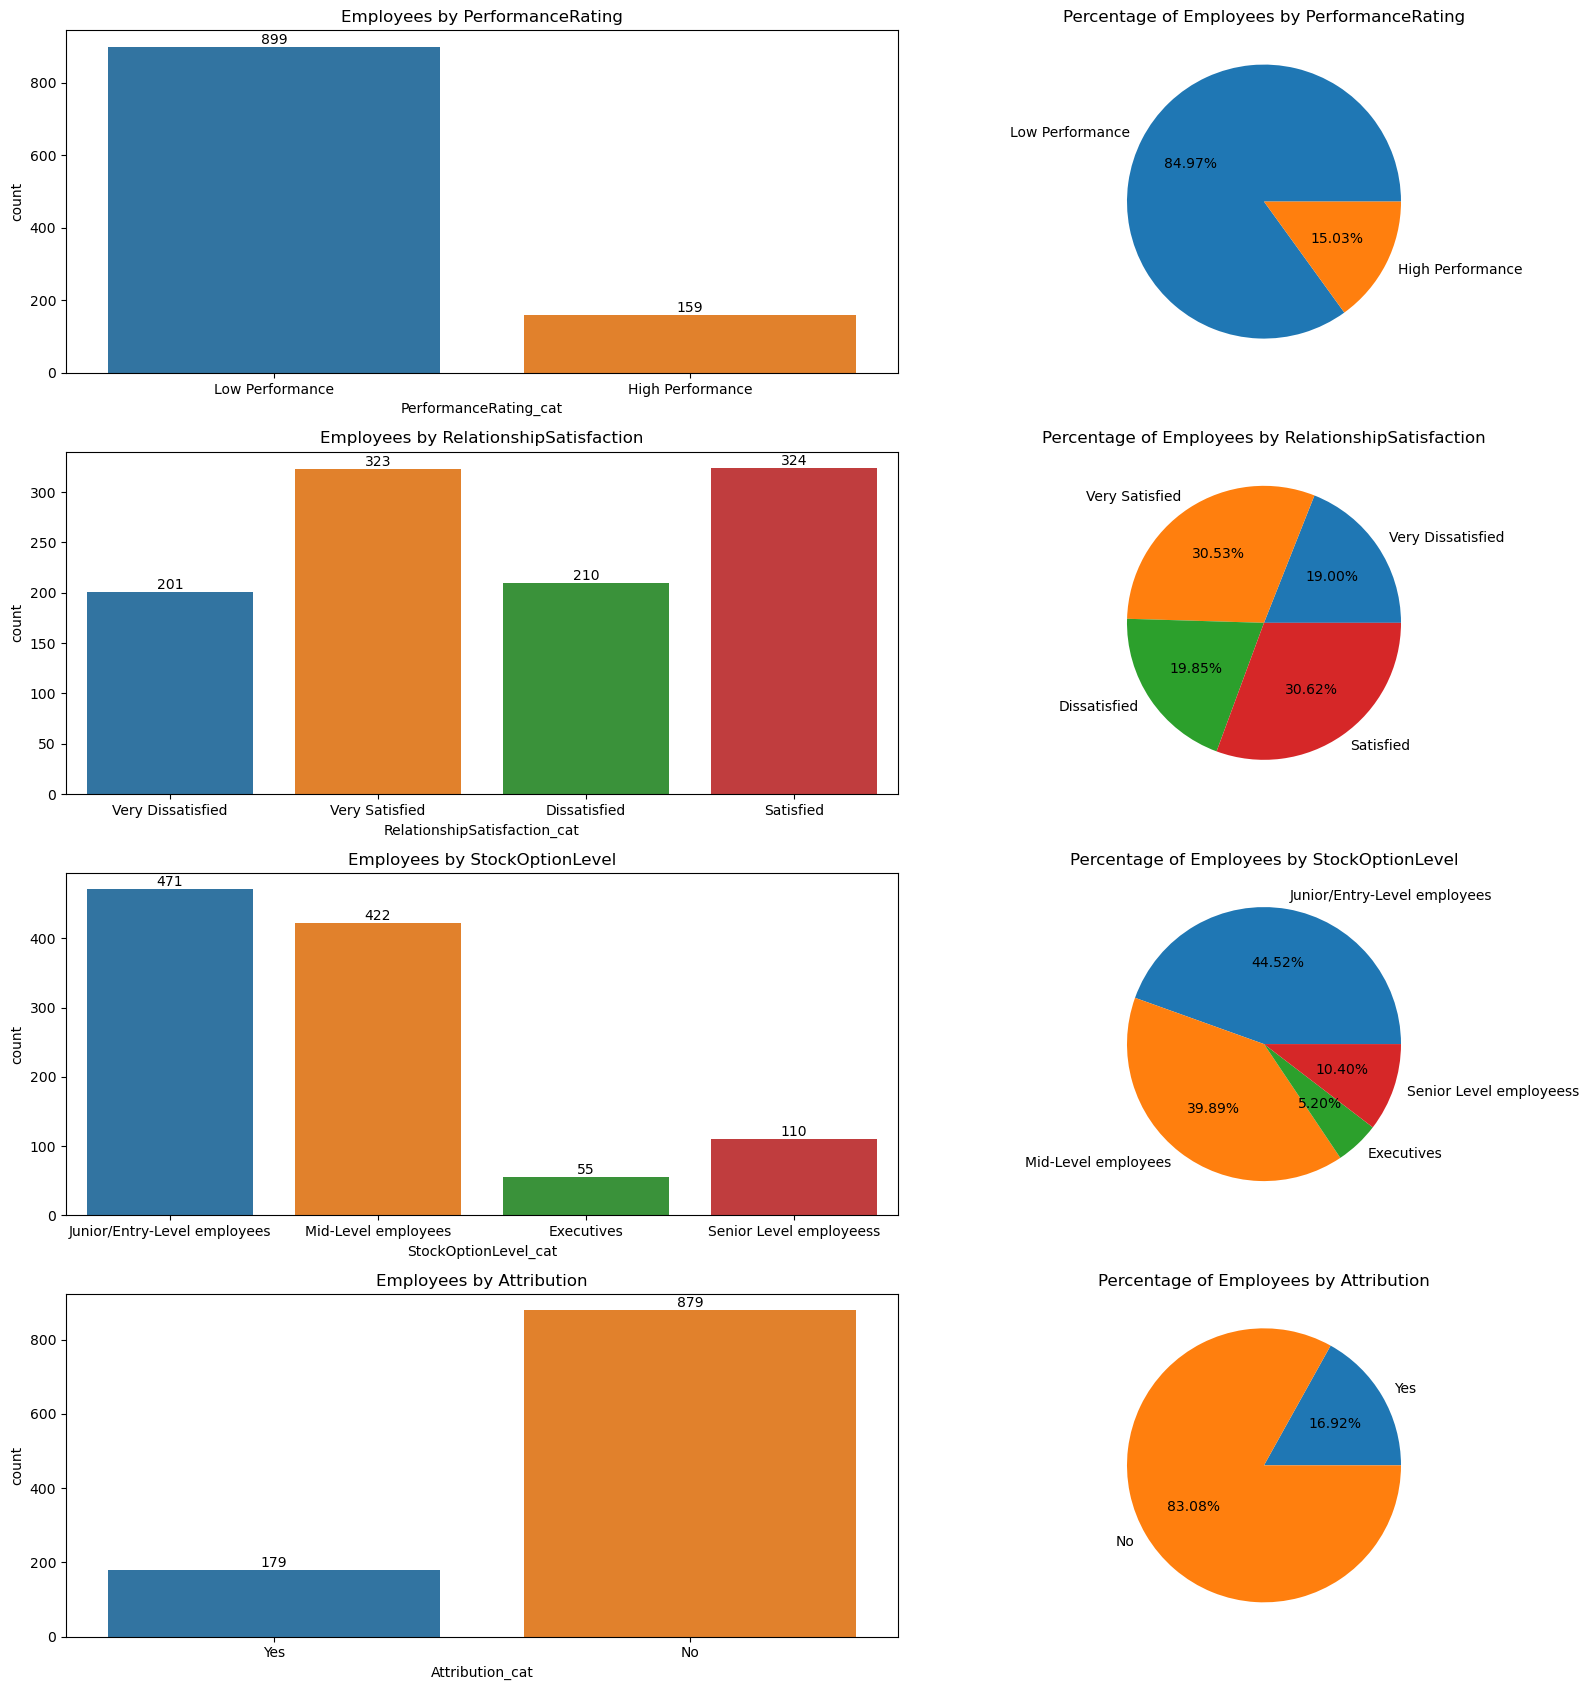

In [26]:
fig, axs = plt.subplots(4,2, figsize = (17,17))

ax = sns.countplot(x = df['PerformanceRating_cat'], ax = axs[0,0])
ax.bar_label(ax.containers[0])
axs[0,0].set_title('Employees by PerformanceRating');

count = Counter(df['PerformanceRating_cat'])
axs[0,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[0,1].set_title('Percentage of Employees by PerformanceRating')

ax = sns.countplot(x = df['RelationshipSatisfaction_cat'], ax = axs[1,0])
ax.bar_label(ax.containers[0])
axs[1,0].set_title('Employees by RelationshipSatisfaction')

count = Counter(df['RelationshipSatisfaction_cat'])
axs[1,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[1,1].set_title('Percentage of Employees by RelationshipSatisfaction')

ax = sns.countplot(x = df['StockOptionLevel_cat'], ax = axs[2,0])
ax.bar_label(ax.containers[0])
axs[2,0].set_title('Employees by StockOptionLevel')

count = Counter(df['StockOptionLevel_cat'])
axs[2,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[2,1].set_title('Percentage of Employees by StockOptionLevel')

ax = sns.countplot(x = df['Attribution_cat'], ax = axs[3,0])
ax.bar_label(ax.containers[0])
axs[3,0].set_title('Employees by Attribution')

count = Counter(df['Attribution_cat'])
axs[3,1].pie(count.values(), labels = count.keys(), autopct = lambda p:f'{p:.2f}%')
axs[3,1].set_title('Percentage of Employees by Attribution')

plt.tight_layout();

##### **Observations**
- 84.97% of staffs have a low performance rating while 15.03% of staffs have high performance rating.
- In terms of Relationshipship Satisfaction 30.53% are very satisfied , 30.62% are satisfied, 19.85% are Dissatisvied while 19% are very dissatisfied.
- In terms of StockOptionLevel, JUnior/Entry level has 44.52%, Mid-level employees have 39.89%, Senior-level employees have 10.40%, Executives with 5.20%.
- Employees by Attribution No has 83.08% while Yes has 16.92%

### Numerical Visualization

#### Histogram
##### MonthlyIncome | DailyRate | HourlyRate | MonthlyRate | PercentSalaryHike | DistanceFromHome | NumCompaniesWorked | StandardHours | TotalWorkingYears | TrainingTimesLastYear | Age | YearsAtCompany | YearsInCurrentRole | YearsSinceLastPromotion | YearsWithCurrManager| 

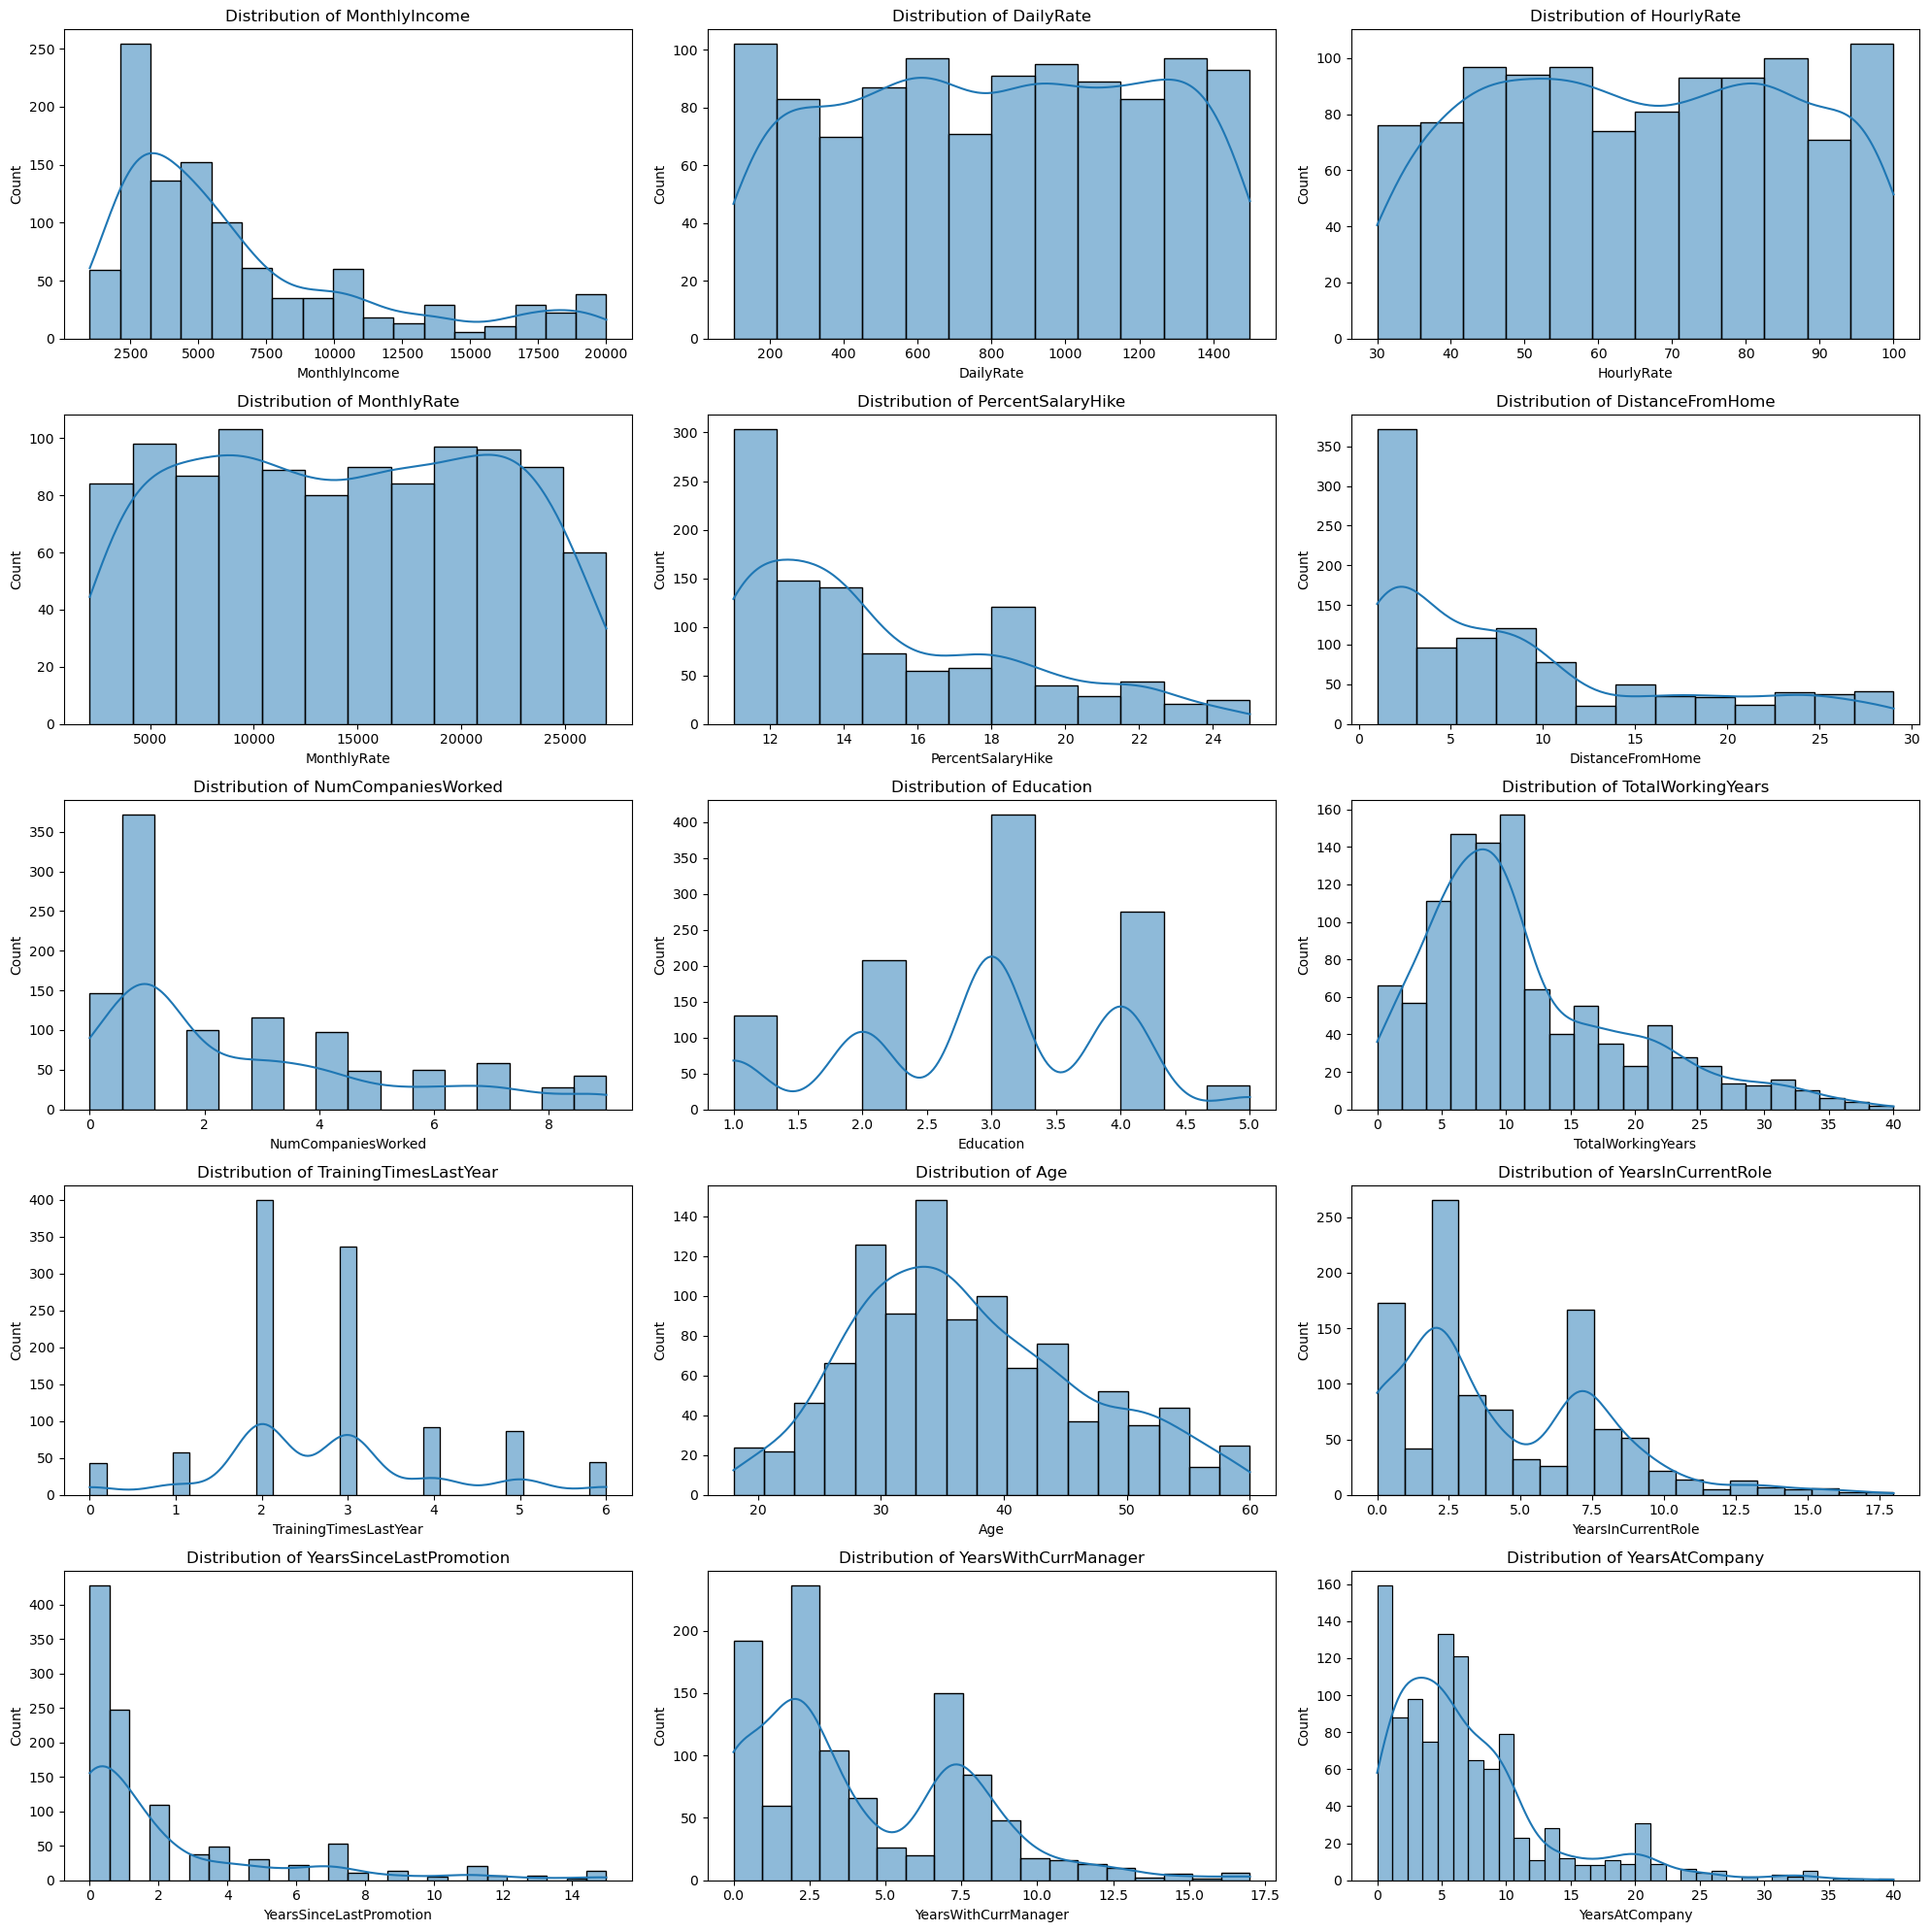

In [27]:
fig, axs = plt.subplots(5,3, figsize=(20,20))

ax = sns.histplot(x = 'MonthlyIncome', data = df, ax = axs[0,0], kde = True)
axs[0,0].set_title('Distribution of MonthlyIncome')

ax = sns.histplot(x = 'DailyRate', data = df, ax = axs[0,1], kde = True)
axs[0,1].set_title('Distribution of DailyRate')

ax = sns.histplot(x = 'HourlyRate', data = df, ax = axs[0,2], kde = True)
axs[0,2].set_title('Distribution of HourlyRate')

ax = sns.histplot(x = 'MonthlyRate', data = df, ax = axs[1,0], kde = True)
axs[1,0].set_title('Distribution of MonthlyRate')

ax = sns.histplot(x = 'PercentSalaryHike', data = df, ax = axs[1,1], kde = True)
axs[1,1].set_title('Distribution of PercentSalaryHike')

ax = sns.histplot(x = 'DistanceFromHome', data = df, ax = axs[1,2], kde = True)
axs[1,2].set_title('Distribution of DistanceFromHome')

ax = sns.histplot(x = 'NumCompaniesWorked', data = df, ax = axs[2,0], kde = True)
axs[2,0].set_title('Distribution of NumCompaniesWorked')

ax = sns.histplot(x = 'Education', data = df, ax = axs[2,1], kde = True)
axs[2,1].set_title('Distribution of Education')

ax = sns.histplot(x = 'TotalWorkingYears', data = df, ax = axs[2,2], kde = True)
axs[2,2].set_title('Distribution of TotalWorkingYears')

ax = sns.histplot(x = 'TrainingTimesLastYear', data = df, ax = axs[3,0], kde = True)
axs[3,0].set_title('Distribution of TrainingTimesLastYear')

ax = sns.histplot(x = 'Age', data = df, ax = axs[3,1], kde = True)
axs[3,1].set_title('Distribution of Age')

ax = sns.histplot(x = 'YearsInCurrentRole', data = df, ax = axs[3,2], kde = True)
axs[3,2].set_title('Distribution of YearsInCurrentRole')

ax = sns.histplot(x = 'YearsSinceLastPromotion', data = df, ax = axs[4,0], kde = True)
axs[4,0].set_title('Distribution of YearsSinceLastPromotion')

ax = sns.histplot(x = 'YearsWithCurrManager', data = df, ax = axs[4,1], kde = True)
axs[4,1].set_title('Distribution of YearsWithCurrManager')

ax = sns.histplot(x = 'YearsAtCompany', data = df, ax = axs[4,2], kde = True)
axs[4,2].set_title('Distribution of YearsAtCompany')

plt.tight_layout();

#### Boxplot
##### MonthlyIncome | DailyRate | HourlyRate | MonthlyRate | PercentSalaryHike | DistanceFromHome | NumCompaniesWorked | StandardHours | TotalWorkingYears | TrainingTimesLastYear | Age | YearsAtCompany | YearsInCurrentRole | YearsSinceLastPromotion | YearsWithCurrManager| 

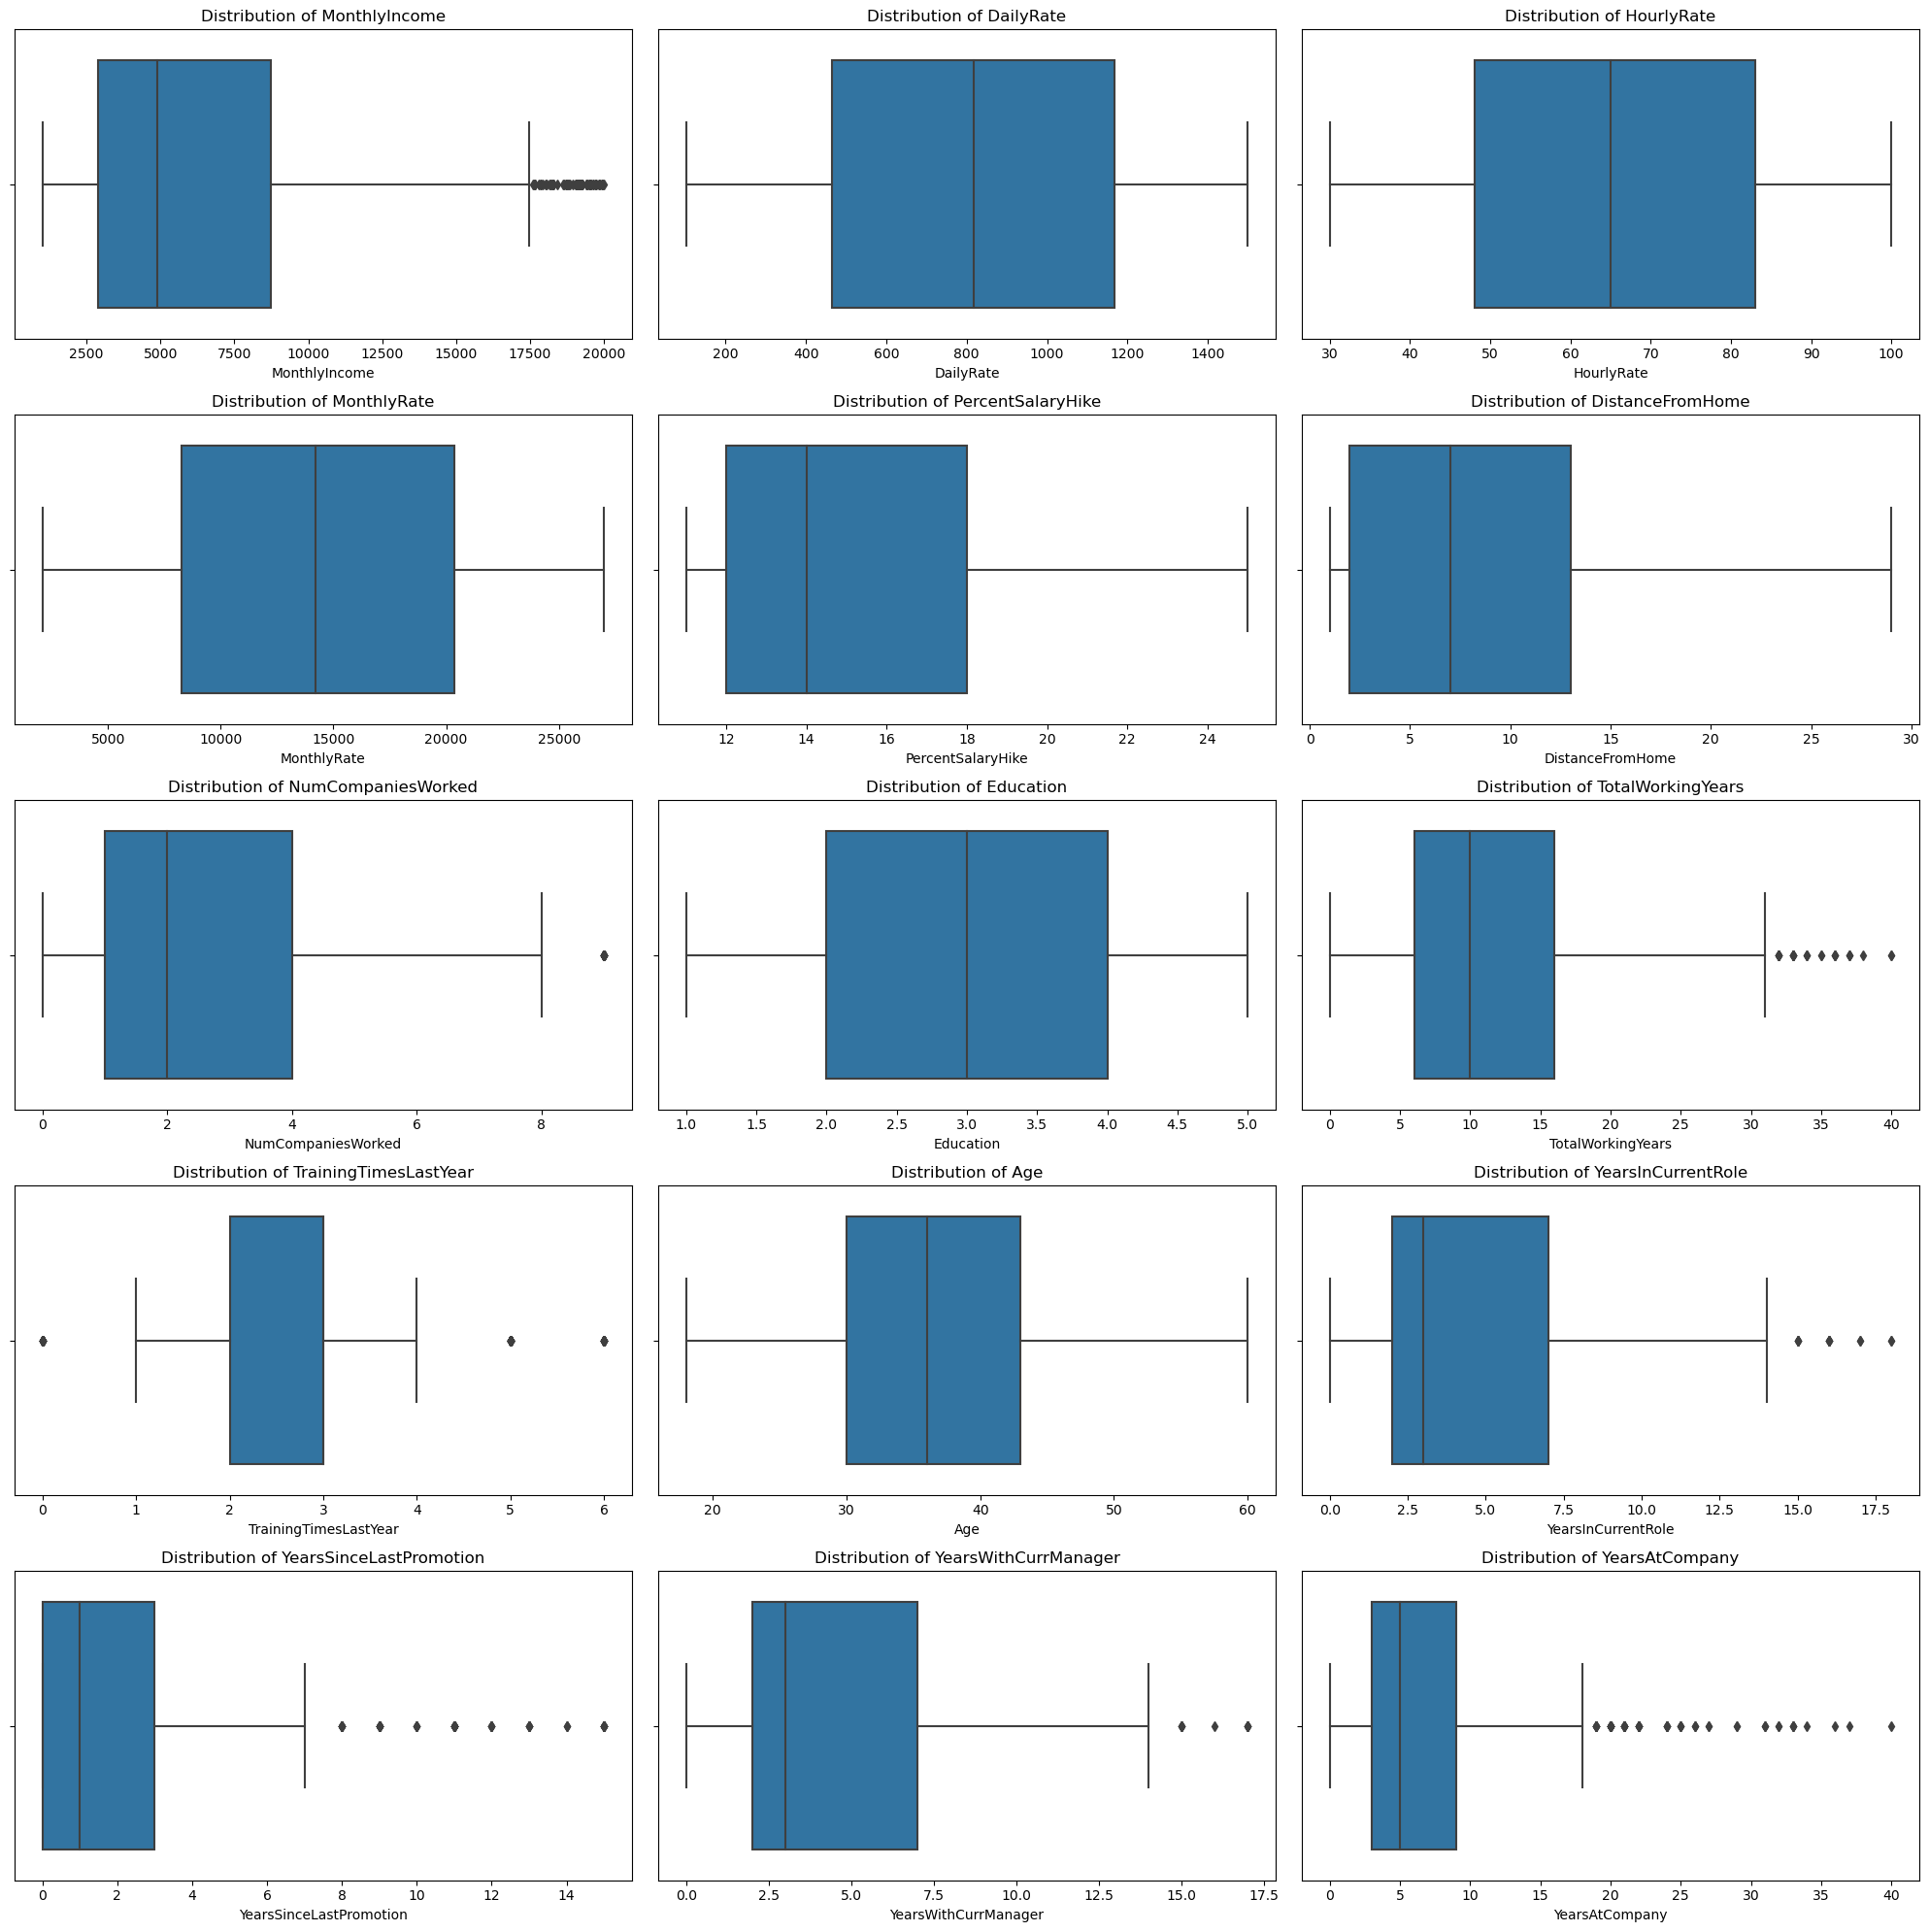

In [28]:
fig, axs = plt.subplots(5,3, figsize=(20,20))

ax = sns.boxplot(x = 'MonthlyIncome', data = df, ax = axs[0,0])
axs[0,0].set_title('Distribution of MonthlyIncome')

ax = sns.boxplot(x = 'DailyRate', data = df, ax = axs[0,1])
axs[0,1].set_title('Distribution of DailyRate')

ax = sns.boxplot(x = 'HourlyRate', data = df, ax = axs[0,2])
axs[0,2].set_title('Distribution of HourlyRate')

ax = sns.boxplot(x = 'MonthlyRate', data = df, ax = axs[1,0])
axs[1,0].set_title('Distribution of MonthlyRate')

ax = sns.boxplot(x = 'PercentSalaryHike', data = df, ax = axs[1,1])
axs[1,1].set_title('Distribution of PercentSalaryHike')

ax = sns.boxplot(x = 'DistanceFromHome', data = df, ax = axs[1,2])
axs[1,2].set_title('Distribution of DistanceFromHome')

ax = sns.boxplot(x = 'NumCompaniesWorked', data = df, ax = axs[2,0])
axs[2,0].set_title('Distribution of NumCompaniesWorked')

ax = sns.boxplot(x = 'Education', data = df, ax = axs[2,1])
axs[2,1].set_title('Distribution of Education')

ax = sns.boxplot(x = 'TotalWorkingYears', data = df, ax = axs[2,2])
axs[2,2].set_title('Distribution of TotalWorkingYears')

ax = sns.boxplot(x = 'TrainingTimesLastYear', data = df, ax = axs[3,0])
axs[3,0].set_title('Distribution of TrainingTimesLastYear')

ax = sns.boxplot(x = 'Age', data = df, ax = axs[3,1])
axs[3,1].set_title('Distribution of Age')

ax = sns.boxplot(x = 'YearsInCurrentRole', data = df, ax = axs[3,2])
axs[3,2].set_title('Distribution of YearsInCurrentRole')

ax = sns.boxplot(x = 'YearsSinceLastPromotion', data = df, ax = axs[4,0])
axs[4,0].set_title('Distribution of YearsSinceLastPromotion')

ax = sns.boxplot(x = 'YearsWithCurrManager', data = df, ax = axs[4,1])
axs[4,1].set_title('Distribution of YearsWithCurrManager')

ax = sns.boxplot(x = 'YearsAtCompany', data = df, ax = axs[4,2])
axs[4,2].set_title('Distribution of YearsAtCompany')

plt.tight_layout();

##### **Observations**
Right(Positive) skewed - DataPoint are to the right while outliers are to the left.

Left(Negative) skewed - DataPoint are to the left while outliers are to the right.

Normal Distribution - Data is evenly distributed.

**Right(Positive) skewed features with Outliers**
- MonthlyIncome, NumbersofCompaniesworked, TotalWorkingYears, YearsInCurrentRole, YearsSiceLastPromotion, YearsWithCurrentManager, YearsAtCompany

**Right(Positive) skewed features without Outliers**
- PercentageSalaryHike, DistanceFromHome

For Right(Positive) skewed features with Outliers - Majority of the employees are at the low end of these features. for example monthlyincome: Majority of the employees take home low Monthly Incomes compare to the number of staffs that are highly paid, while outliers means some staffs are overpaid.

For Right(Positive) skewed features without Outliers - Majority of the employees are at the low end of these features. for example Percentagesalaryhike: Majority of the employees have low percentage salary increment compare to the number of staffs have high percentage salary increment, while  without outliers means the percentage hike is in the normal bracket range.

For Normal Distribution - the mean is equal(=) to the median

## Bivariate Analysis

##### Group 1.1 : Customer Bio-Data :
#### Gender | age_group | MaritalStatus | EducationField | Education | Department |

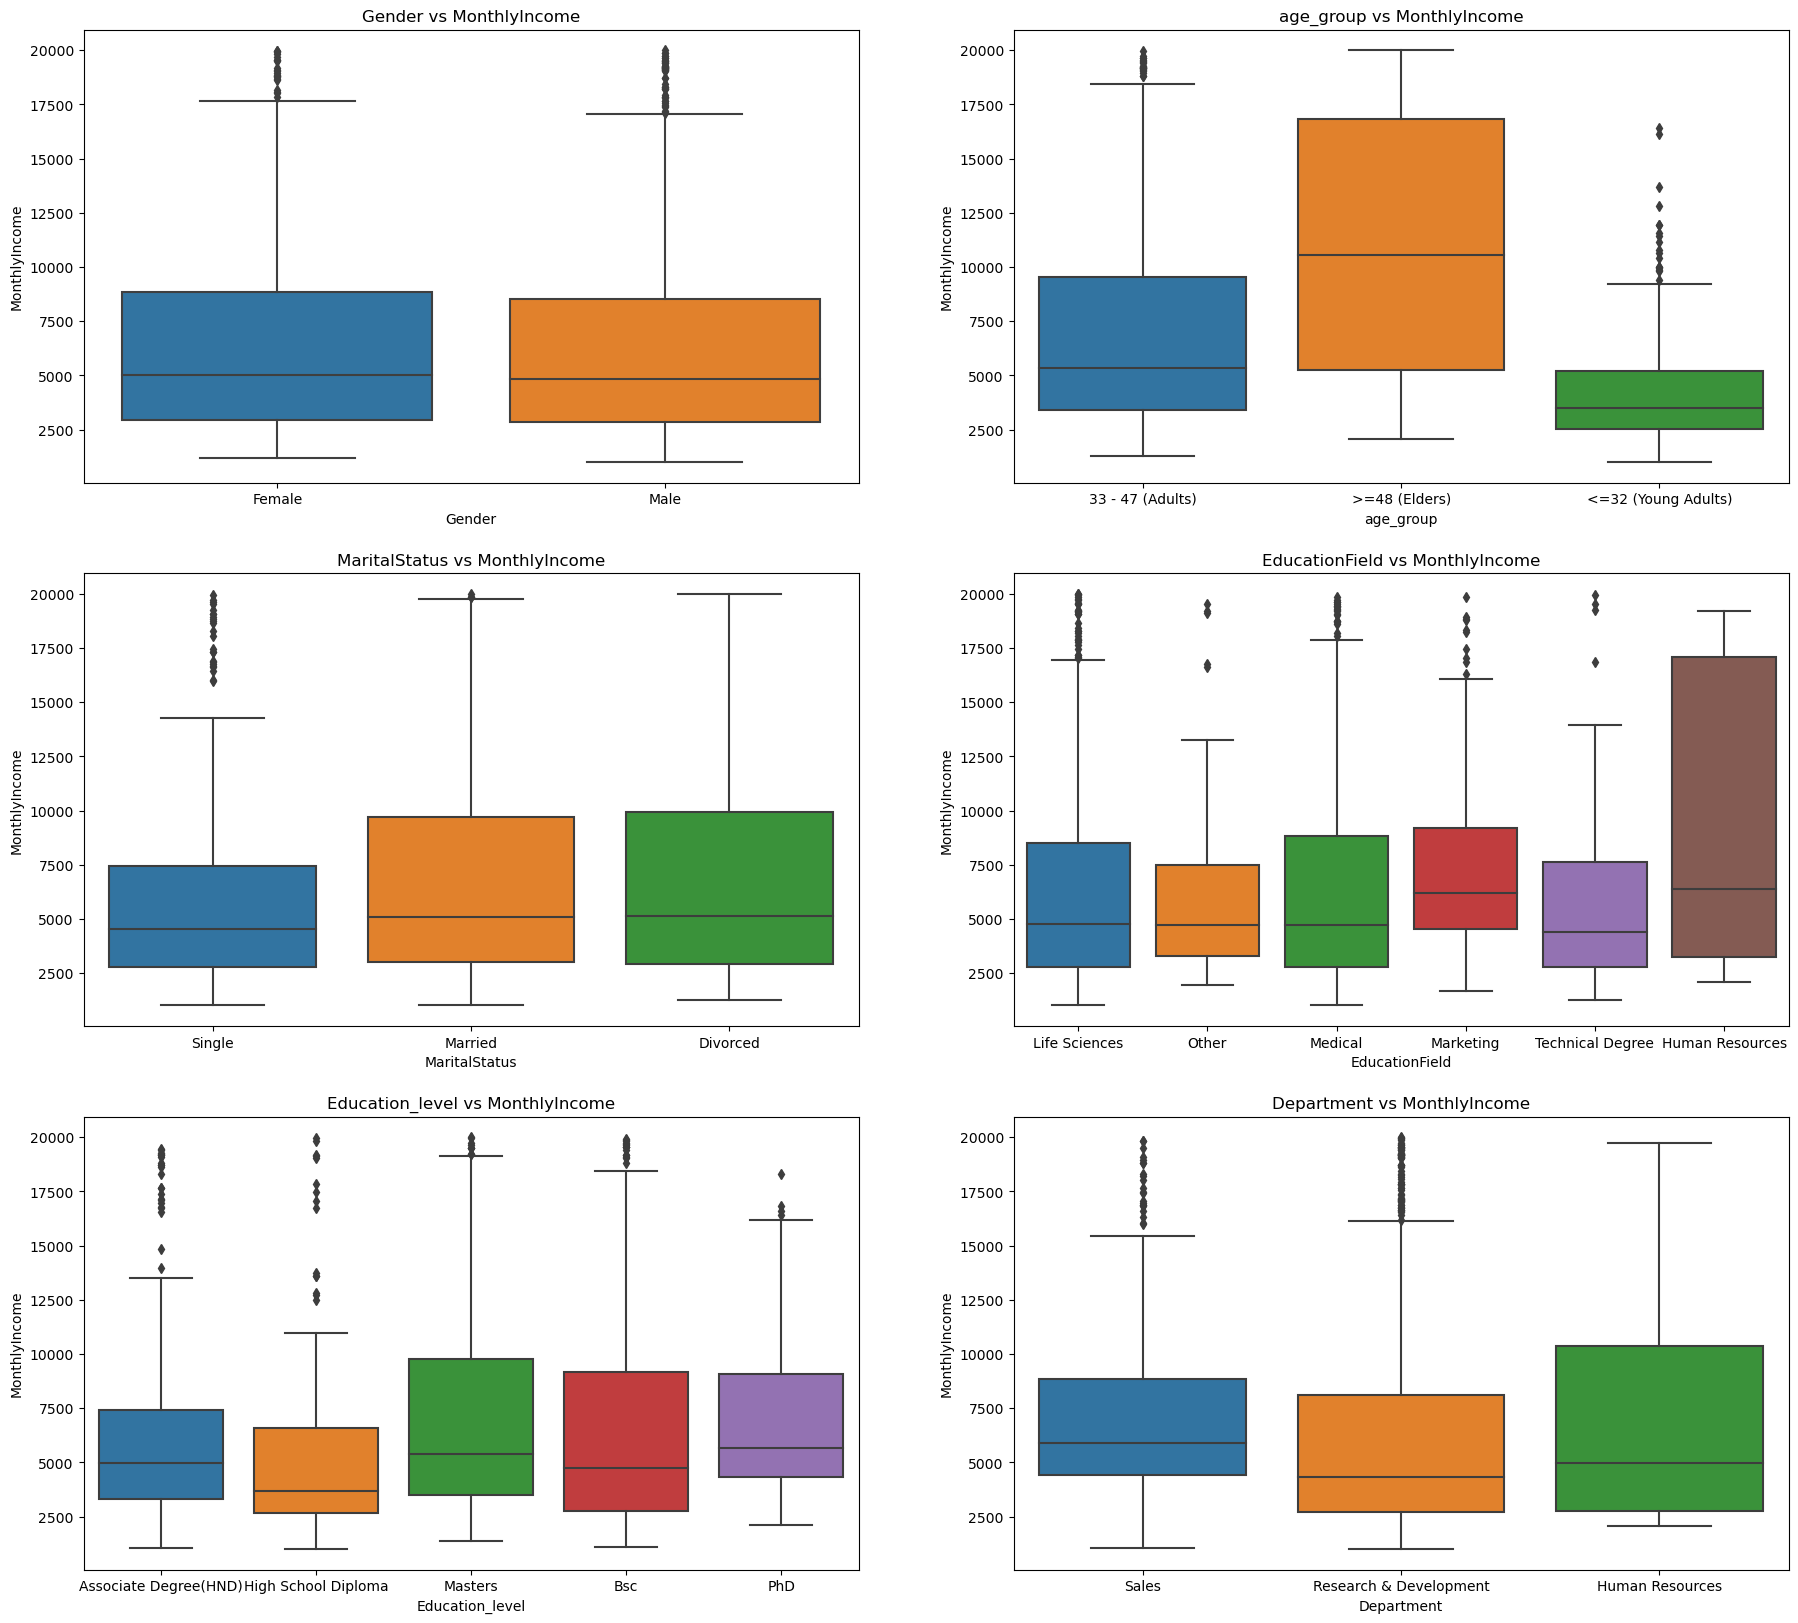

In [29]:
fig, axs = plt.subplots(3,2, figsize = (22,20))

ax = sns.boxplot(x = 'Gender', y='MonthlyIncome', data=df,  ax = axs[0,0])
axs[0,0].set_title('Gender vs MonthlyIncome')

ax = sns.boxplot(x = 'age_group', y='MonthlyIncome', data=df,  ax = axs[0,1])
axs[0,1].set_title('age_group vs MonthlyIncome')

ax = sns.boxplot(x = 'MaritalStatus', y='MonthlyIncome', data=df,  ax = axs[1,0])
axs[1,0].set_title('MaritalStatus vs MonthlyIncome')

ax = sns.boxplot(x = 'EducationField', y='MonthlyIncome', data=df,  ax = axs[1,1])
axs[1,1].set_title('EducationField vs MonthlyIncome')

ax = sns.boxplot(x = 'Education_level', y='MonthlyIncome', data=df,  ax = axs[2,0])
axs[2,0].set_title('Education_level vs MonthlyIncome')

ax = sns.boxplot(x = 'Department', y='MonthlyIncome', data=df,  ax = axs[2,1])
axs[2,1].set_title('Department vs MonthlyIncome')

plt.tight_layout;

##### **Observations**
- Male & Female categories are similarly distributed wrt MonthlyIncome. Outliers can also be observed.
- Employees that are 48 above have an evenly distributed Monthlyincome. For Adults & Young Adults we can see outliers
- Married and divorced staffs have the same MonthlyIncome distribution while majority of the distribution for singles falls with 2500 - 7500. Outliers in monthlyincome can also be observed for married and single staffs.
- Outliers in MonthlyIncome can also be seen across all EducationField except Human Resources. MonthlyIncome are evenly distributed across staffs with background in Human Resources.
- Outliers in MonthlyIncome can also be seen across all Education levels.
- Outliers in MonthlyIncome can also be seen across all Department.

####  Group 2.1 : Employment info

##### JobRole | JobLevel | JobInvolvement | JobSatisfaction | WorkLifeBalance | Environsatisfaction | BusinessTravel | OverTime | PerformanceRating | RelationshipSatisfaction | StockOptionLevel | Attribution¶

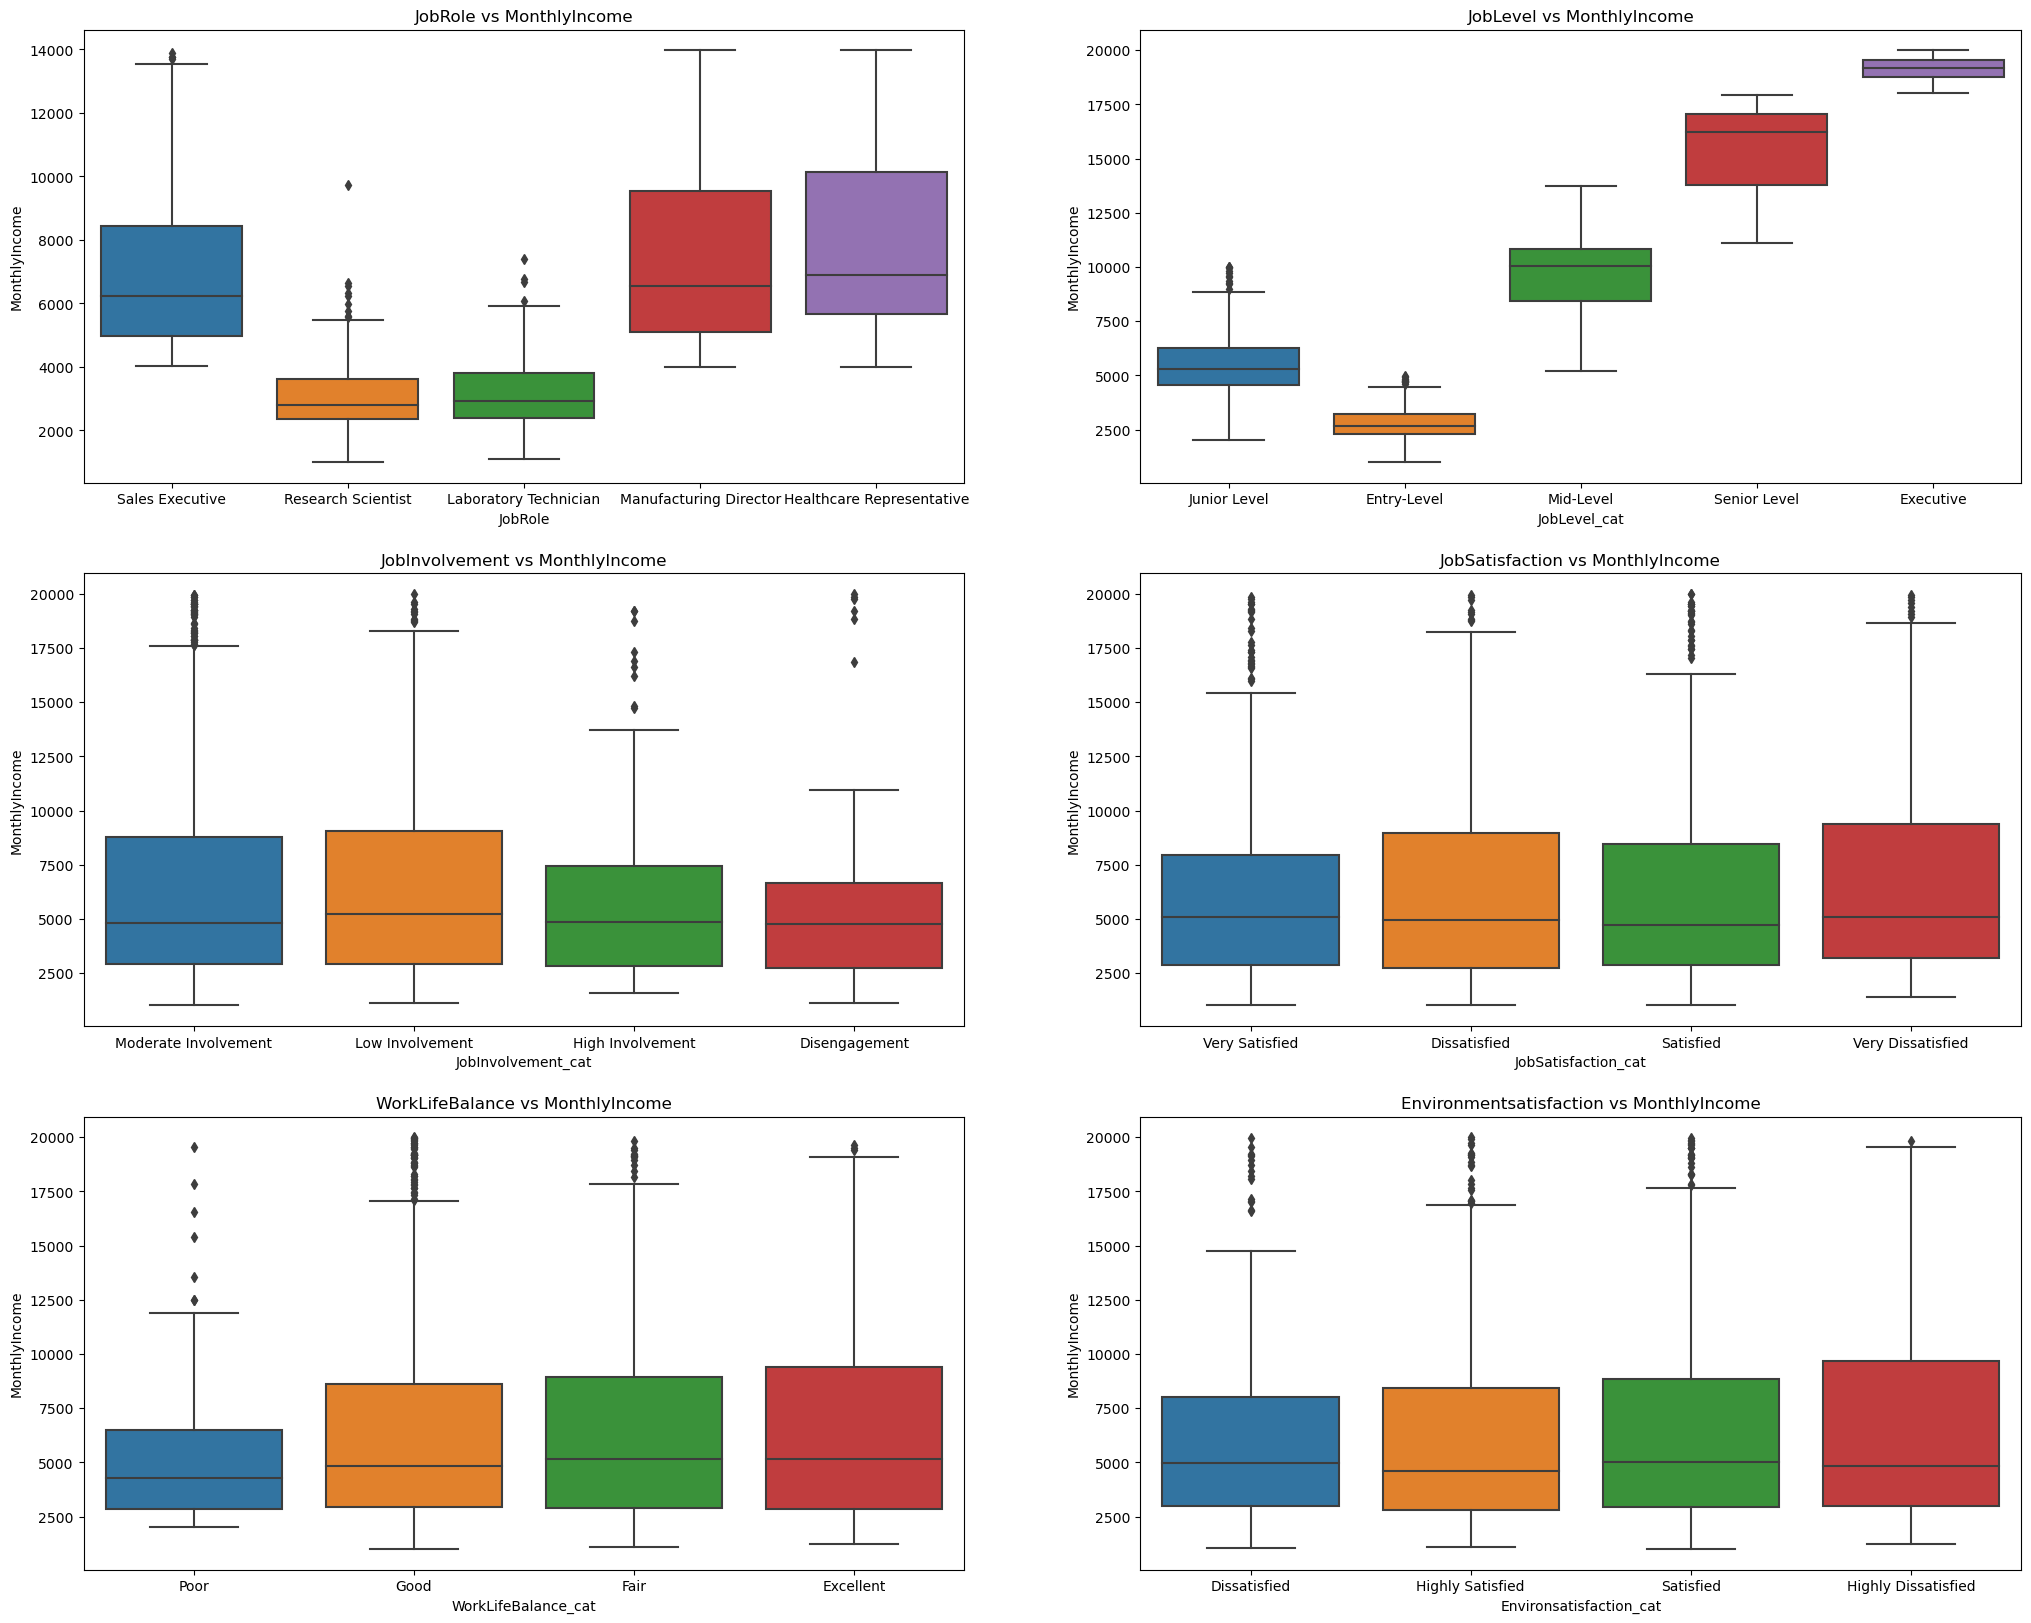

In [30]:
fig, axs = plt.subplots(3,2, figsize = (25,20))

topfive = df['JobRole'].value_counts().head(5)
ax = sns.boxplot(x = 'JobRole', y='MonthlyIncome', data=df, ax = axs[0,0], order = topfive.index)
axs[0,0].set_title('JobRole vs MonthlyIncome')

ax = sns.boxplot(x = 'JobLevel_cat', y='MonthlyIncome', data=df,  ax = axs[0,1])
axs[0,1].set_title('JobLevel vs MonthlyIncome')

ax = sns.boxplot(x = 'JobInvolvement_cat', y='MonthlyIncome', data=df,  ax = axs[1,0])
axs[1,0].set_title('JobInvolvement vs MonthlyIncome')

ax = sns.boxplot(x = 'JobSatisfaction_cat', y='MonthlyIncome', data=df,  ax = axs[1,1])
axs[1,1].set_title('JobSatisfaction vs MonthlyIncome')

ax = sns.boxplot(x = 'WorkLifeBalance_cat', y='MonthlyIncome', data=df,  ax = axs[2,0])
axs[2,0].set_title('WorkLifeBalance vs MonthlyIncome')

ax = sns.boxplot(x = 'Environsatisfaction_cat', y='MonthlyIncome', data=df,  ax = axs[2,1])
axs[2,1].set_title('Environmentsatisfaction vs MonthlyIncome')

plt.tight_layout;

##### **Observations**
- Under JobRole, Sales Executive, Manufacturing Director, Healthcare Representative have similar distribution while research scientist and laboratiry technician have similar distribution. Outliers in Monthly income on staffs who are Sales Executive, research scientist and laboratiry technician.
- Under Joblevel, the higher the level, the higher the MonthlyIncome.
- Under JobInvolvement, Moderate & low involvement have similsr distribution while high and disengagement have similar distribution. Outliers are all present in all level of JobInvolvement.
- There are similar distribution across Jobsatisfaction with outliers present in all.
- There are similar distribution across WorkLifeBalance except poor with outliers present in all.
- There are similar distribution across EnvironmentSatisfaction with outliers present in all.

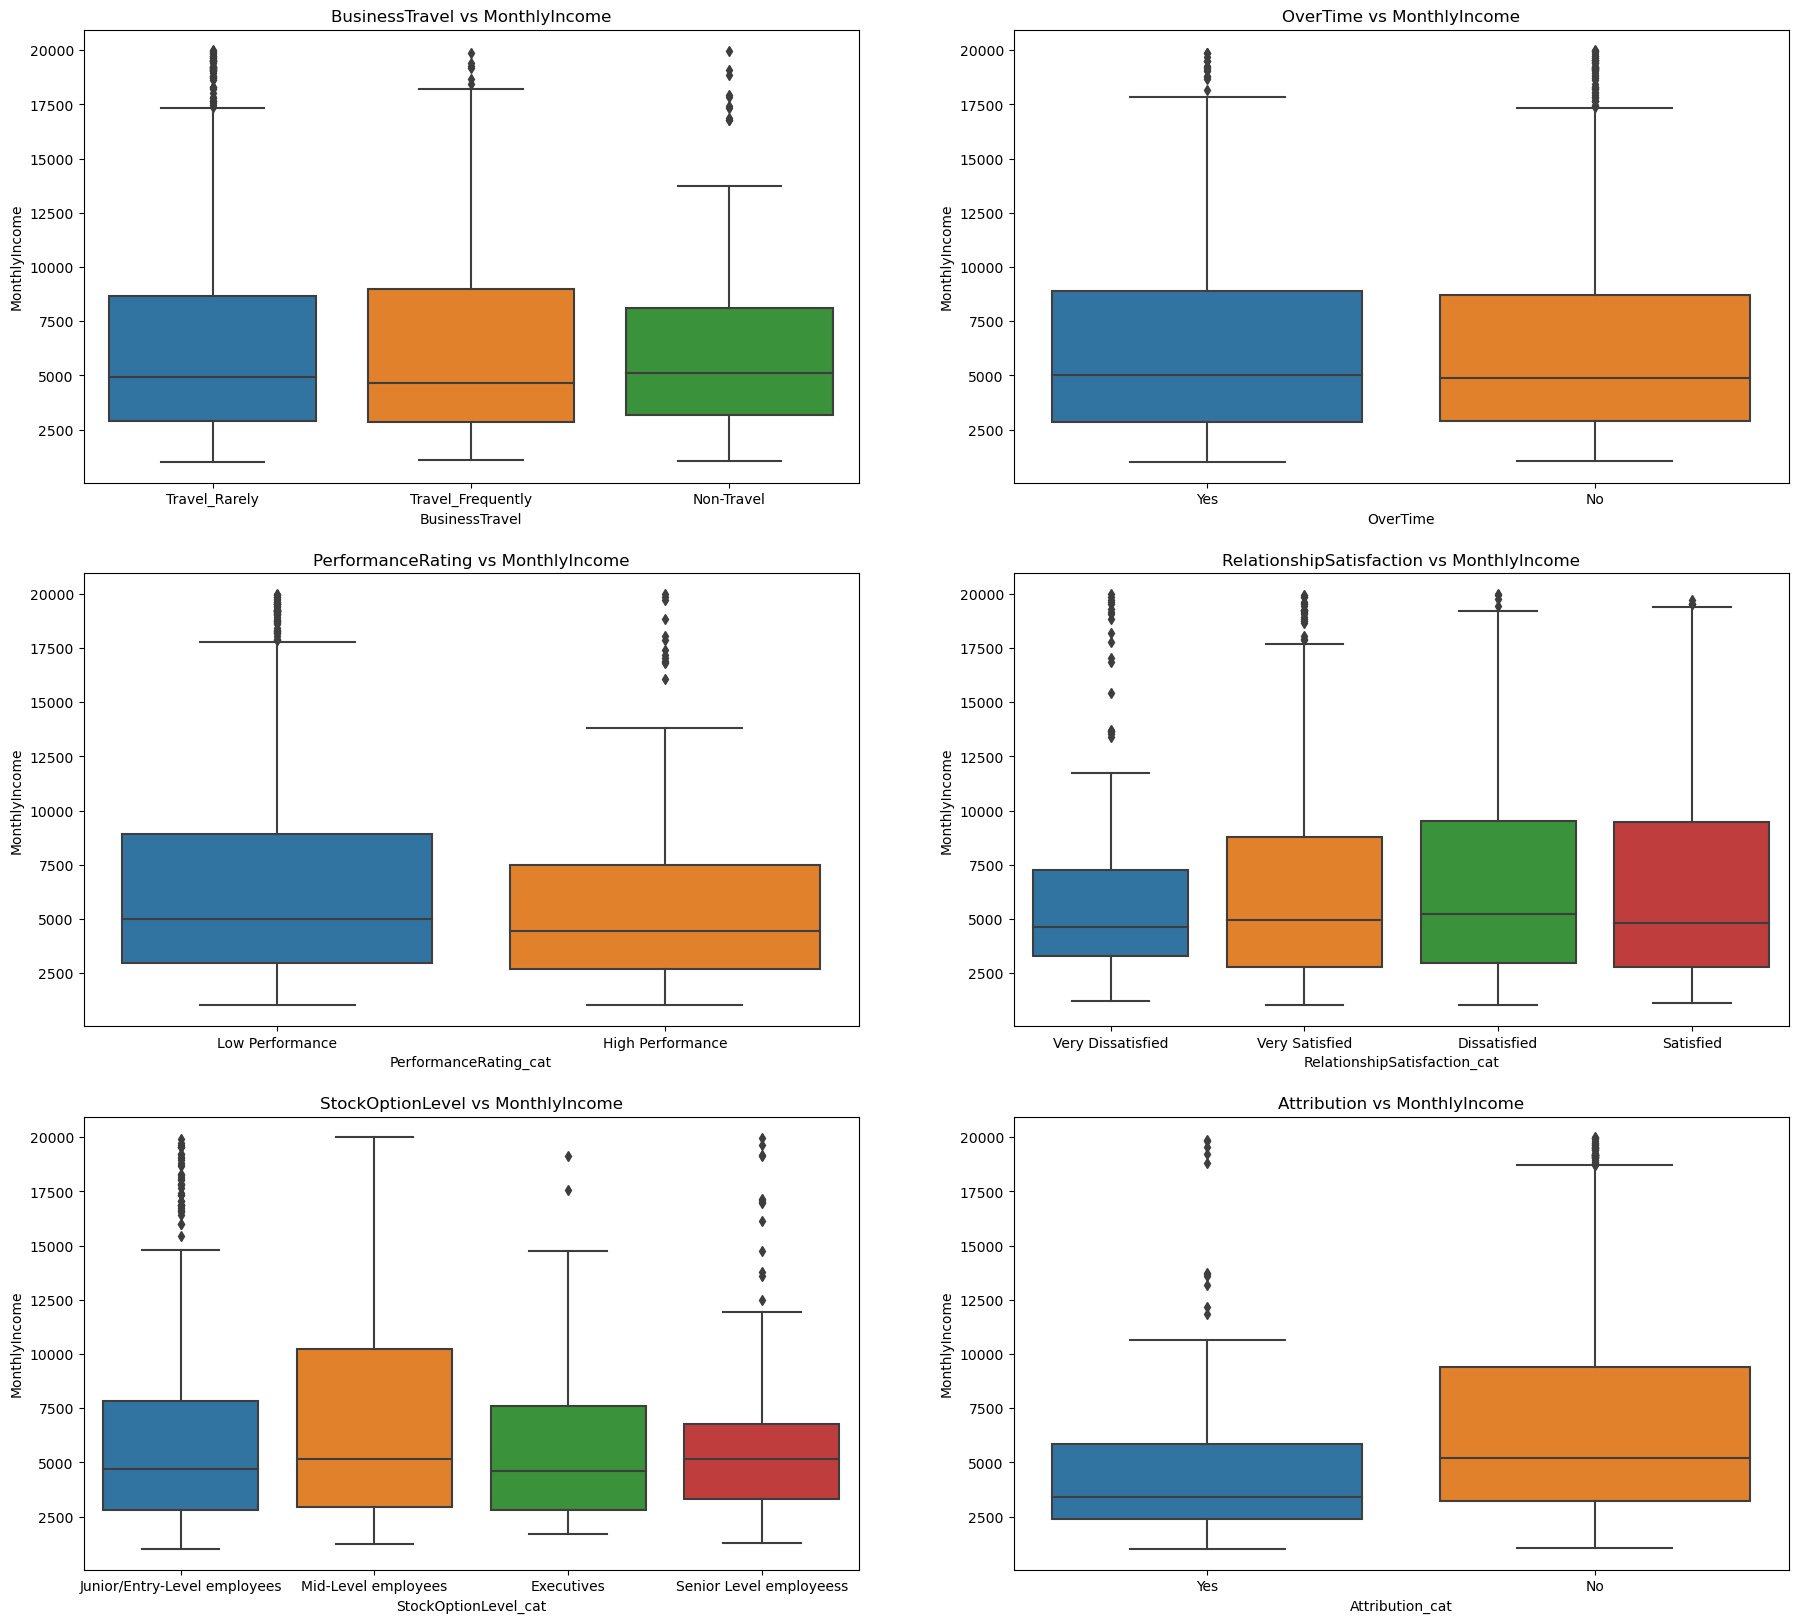

In [31]:
fig, axs = plt.subplots(3,2, figsize = (22,20))

ax = sns.boxplot(x = 'BusinessTravel', y='MonthlyIncome', data=df,  ax = axs[0,0])
axs[0,0].set_title('BusinessTravel vs MonthlyIncome')

ax = sns.boxplot(x = 'OverTime', y='MonthlyIncome', data=df,  ax = axs[0,1])
axs[0,1].set_title('OverTime vs MonthlyIncome')

ax = sns.boxplot(x = 'PerformanceRating_cat', y='MonthlyIncome', data=df,  ax = axs[1,0])
axs[1,0].set_title('PerformanceRating vs MonthlyIncome')

ax = sns.boxplot(x = 'RelationshipSatisfaction_cat', y='MonthlyIncome', data=df,  ax = axs[1,1])
axs[1,1].set_title('RelationshipSatisfaction vs MonthlyIncome')

ax = sns.boxplot(x = 'StockOptionLevel_cat', y='MonthlyIncome', data=df,  ax = axs[2,0])
axs[2,0].set_title('StockOptionLevel vs MonthlyIncome')

ax = sns.boxplot(x = 'Attribution_cat', y='MonthlyIncome', data=df,  ax = axs[2,1])
axs[2,1].set_title('Attribution vs MonthlyIncome')

plt.tight_layout;

##### **Observations**
- There are similar distribution across BusineeTravel with outliers present in all.
- There are similar distribution across OverTime with outliers present in all.
- There are similar distribution across PerformanceRating with outliers present in all.
- There are similar distribution across RelationshipSatisfaction except very dissatisfied with outliers present in all.
- Under StockOptionLevel, Junior/Entry level and Executives have similar distribution with outliers present in all except Mid-level employees.
- Under Attribution, majority of employees with Yes have monthlyincome distribution between 2500 - 7500 and majority of employees with No have monthlyincome distribution between 2500 - 10000.

##### Numerical Visualization
##### MonthlyIncome | DailyRate | HourlyRate | MonthlyRate | PercentSalaryHike | DistanceFromHome | NumCompaniesWorked | StandardHours | TotalWorkingYears | TrainingTimesLastYear | Age | YearsAtCompany | YearsInCurrentRole | YearsSinceLastPromotion | YearsWithCurrManager| 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 46 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Age                           1058 non-null   int64 
 1   Attrition                     1058 non-null   int64 
 2   BusinessTravel                1058 non-null   object
 3   DailyRate                     1058 non-null   int64 
 4   Department                    1058 non-null   object
 5   DistanceFromHome              1058 non-null   int64 
 6   Education                     1058 non-null   int64 
 7   EducationField                1058 non-null   object
 8   EmployeeCount                 1058 non-null   int64 
 9   EmployeeNumber                1058 non-null   int64 
 10  EnvironmentSatisfaction       1058 non-null   int64 
 11  Gender                        1058 non-null   object
 12  HourlyRate                    1058 non-null   int64 
 13  JobInvolvement    

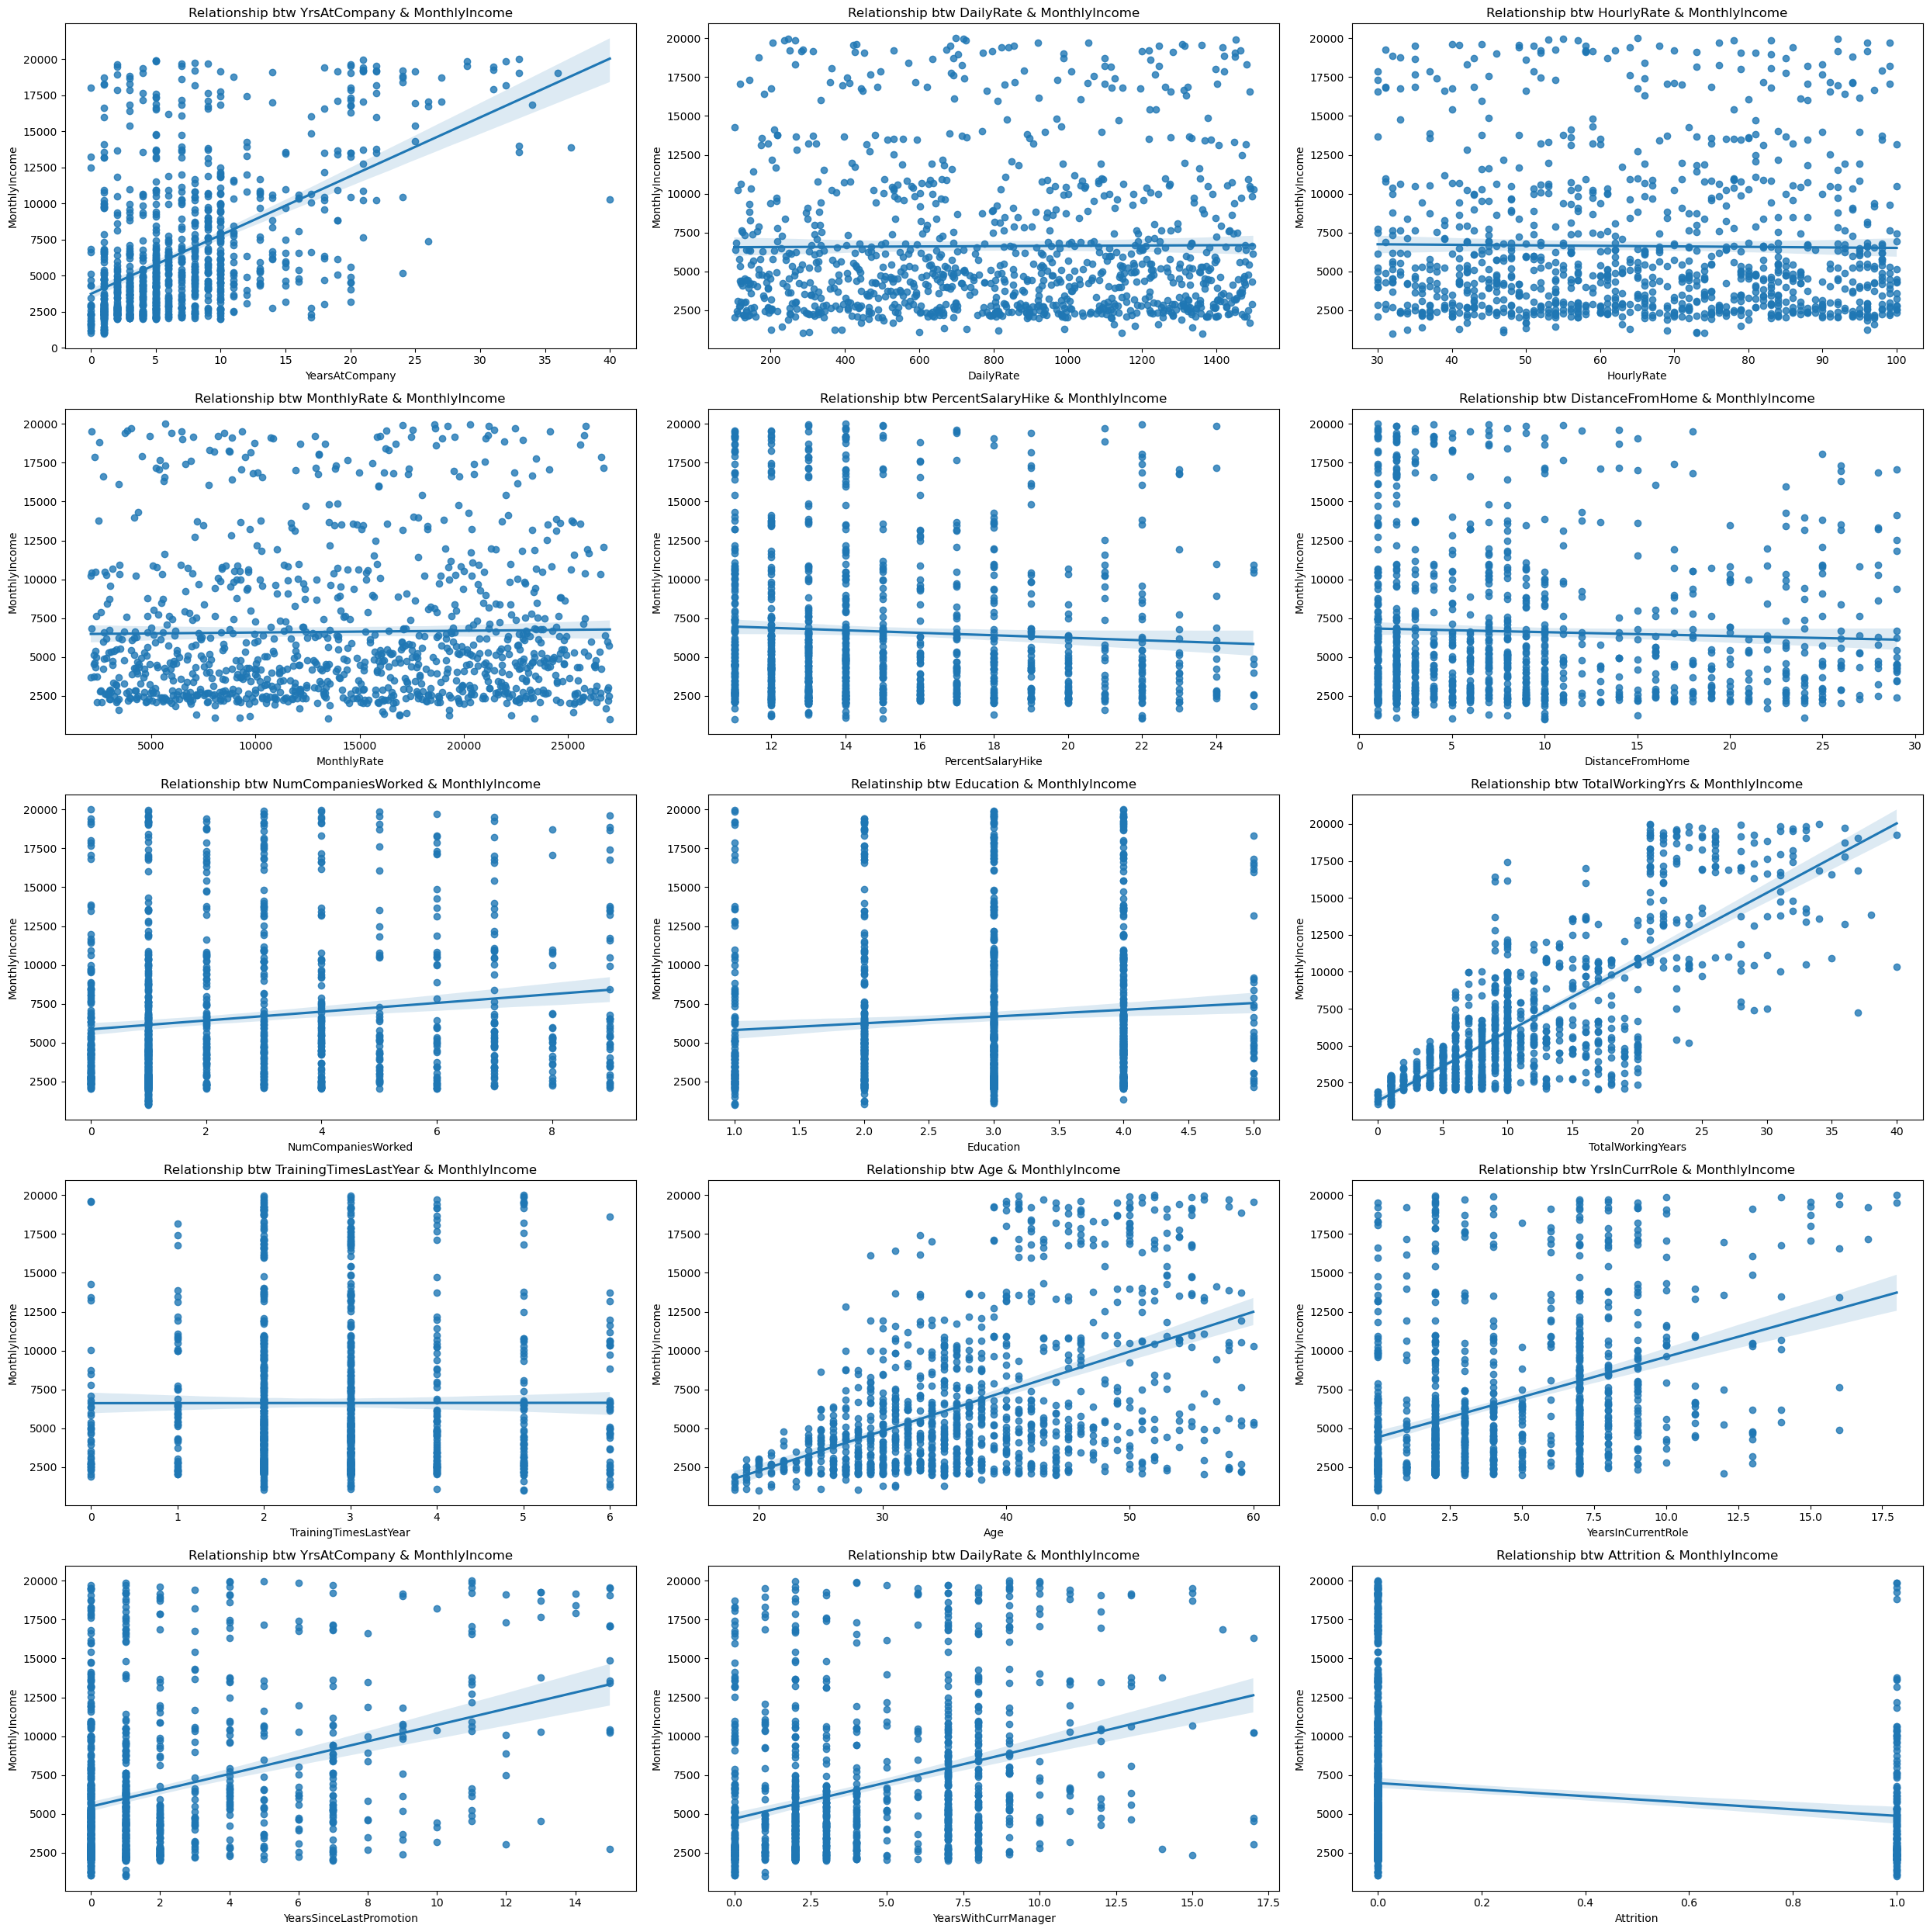

In [33]:
fig, axs = plt.subplots(5,3, figsize=(25,25))

ax = sns.regplot(x = 'YearsAtCompany', y = 'MonthlyIncome', data = df, ax = axs[0,0])
axs[0,0].set_title('Relationship btw YrsAtCompany & MonthlyIncome')

ax = sns.regplot(x = 'DailyRate', y = 'MonthlyIncome', data = df, ax = axs[0,1])
axs[0,1].set_title('Relationship btw DailyRate & MonthlyIncome')

ax = sns.regplot(x = 'HourlyRate', y = 'MonthlyIncome', data = df, ax = axs[0,2])
axs[0,2].set_title('Relationship btw HourlyRate & MonthlyIncome')

ax = sns.regplot(x = 'MonthlyRate', y = 'MonthlyIncome', data = df, ax = axs[1,0])
axs[1,0].set_title('Relationship btw MonthlyRate & MonthlyIncome')

ax = sns.regplot(x = 'PercentSalaryHike', y = 'MonthlyIncome', data = df, ax = axs[1,1])
axs[1,1].set_title('Relationship btw PercentSalaryHike & MonthlyIncome')

ax = sns.regplot(x = 'DistanceFromHome', y = 'MonthlyIncome', data = df, ax = axs[1,2])
axs[1,2].set_title('Relationship btw DistanceFromHome & MonthlyIncome')

ax = sns.regplot(x = 'NumCompaniesWorked', y = 'MonthlyIncome', data = df, ax = axs[2,0])
axs[2,0].set_title('Relationship btw NumCompaniesWorked & MonthlyIncome')

ax = sns.regplot(x = 'Education', y = 'MonthlyIncome', data = df, ax = axs[2,1])
axs[2,1].set_title('Relatinship btw Education & MonthlyIncome')

ax = sns.regplot(x = 'TotalWorkingYears', y = 'MonthlyIncome', data = df, ax = axs[2,2])
axs[2,2].set_title('Relationship btw TotalWorkingYrs & MonthlyIncome')

ax = sns.regplot(x = 'TrainingTimesLastYear', y = 'MonthlyIncome', data = df, ax = axs[3,0])
axs[3,0].set_title('Relationship btw TrainingTimesLastYear & MonthlyIncome')

ax = sns.regplot(x = 'Age', y = 'MonthlyIncome', data = df, ax = axs[3,1])
axs[3,1].set_title('Relationship btw Age & MonthlyIncome')

ax = sns.regplot(x = 'YearsInCurrentRole', y = 'MonthlyIncome', data = df, ax = axs[3,2])
axs[3,2].set_title('Relationship btw YrsInCurrRole & MonthlyIncome')

ax = sns.regplot(x = 'YearsSinceLastPromotion', y = 'MonthlyIncome', data = df, ax = axs[4,0])
axs[4,0].set_title('Relationship btw YrsAtCompany & MonthlyIncome')

ax = sns.regplot(x = 'YearsWithCurrManager', y = 'MonthlyIncome', data = df, ax = axs[4,1])
axs[4,1].set_title('Relationship btw DailyRate & MonthlyIncome')

ax = sns.regplot(x = 'Attrition', y = 'MonthlyIncome', data = df, ax = axs[4,2])
axs[4,2].set_title('Relationship btw Attrition & MonthlyIncome')

plt.tight_layout();

##### **Observations**
- YearsAtCompany, Age, NumCompaniesWorked, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager all have positive correlation with MonthlyIncome.
- Attribution has negative correlation with MonthlyIncome.

## Multivariate Analysis

In [34]:
df['JobInvolvement_cat'].unique()

array(['Moderate Involvement', 'Low Involvement', 'High Involvement',
       'Disengagement'], dtype=object)

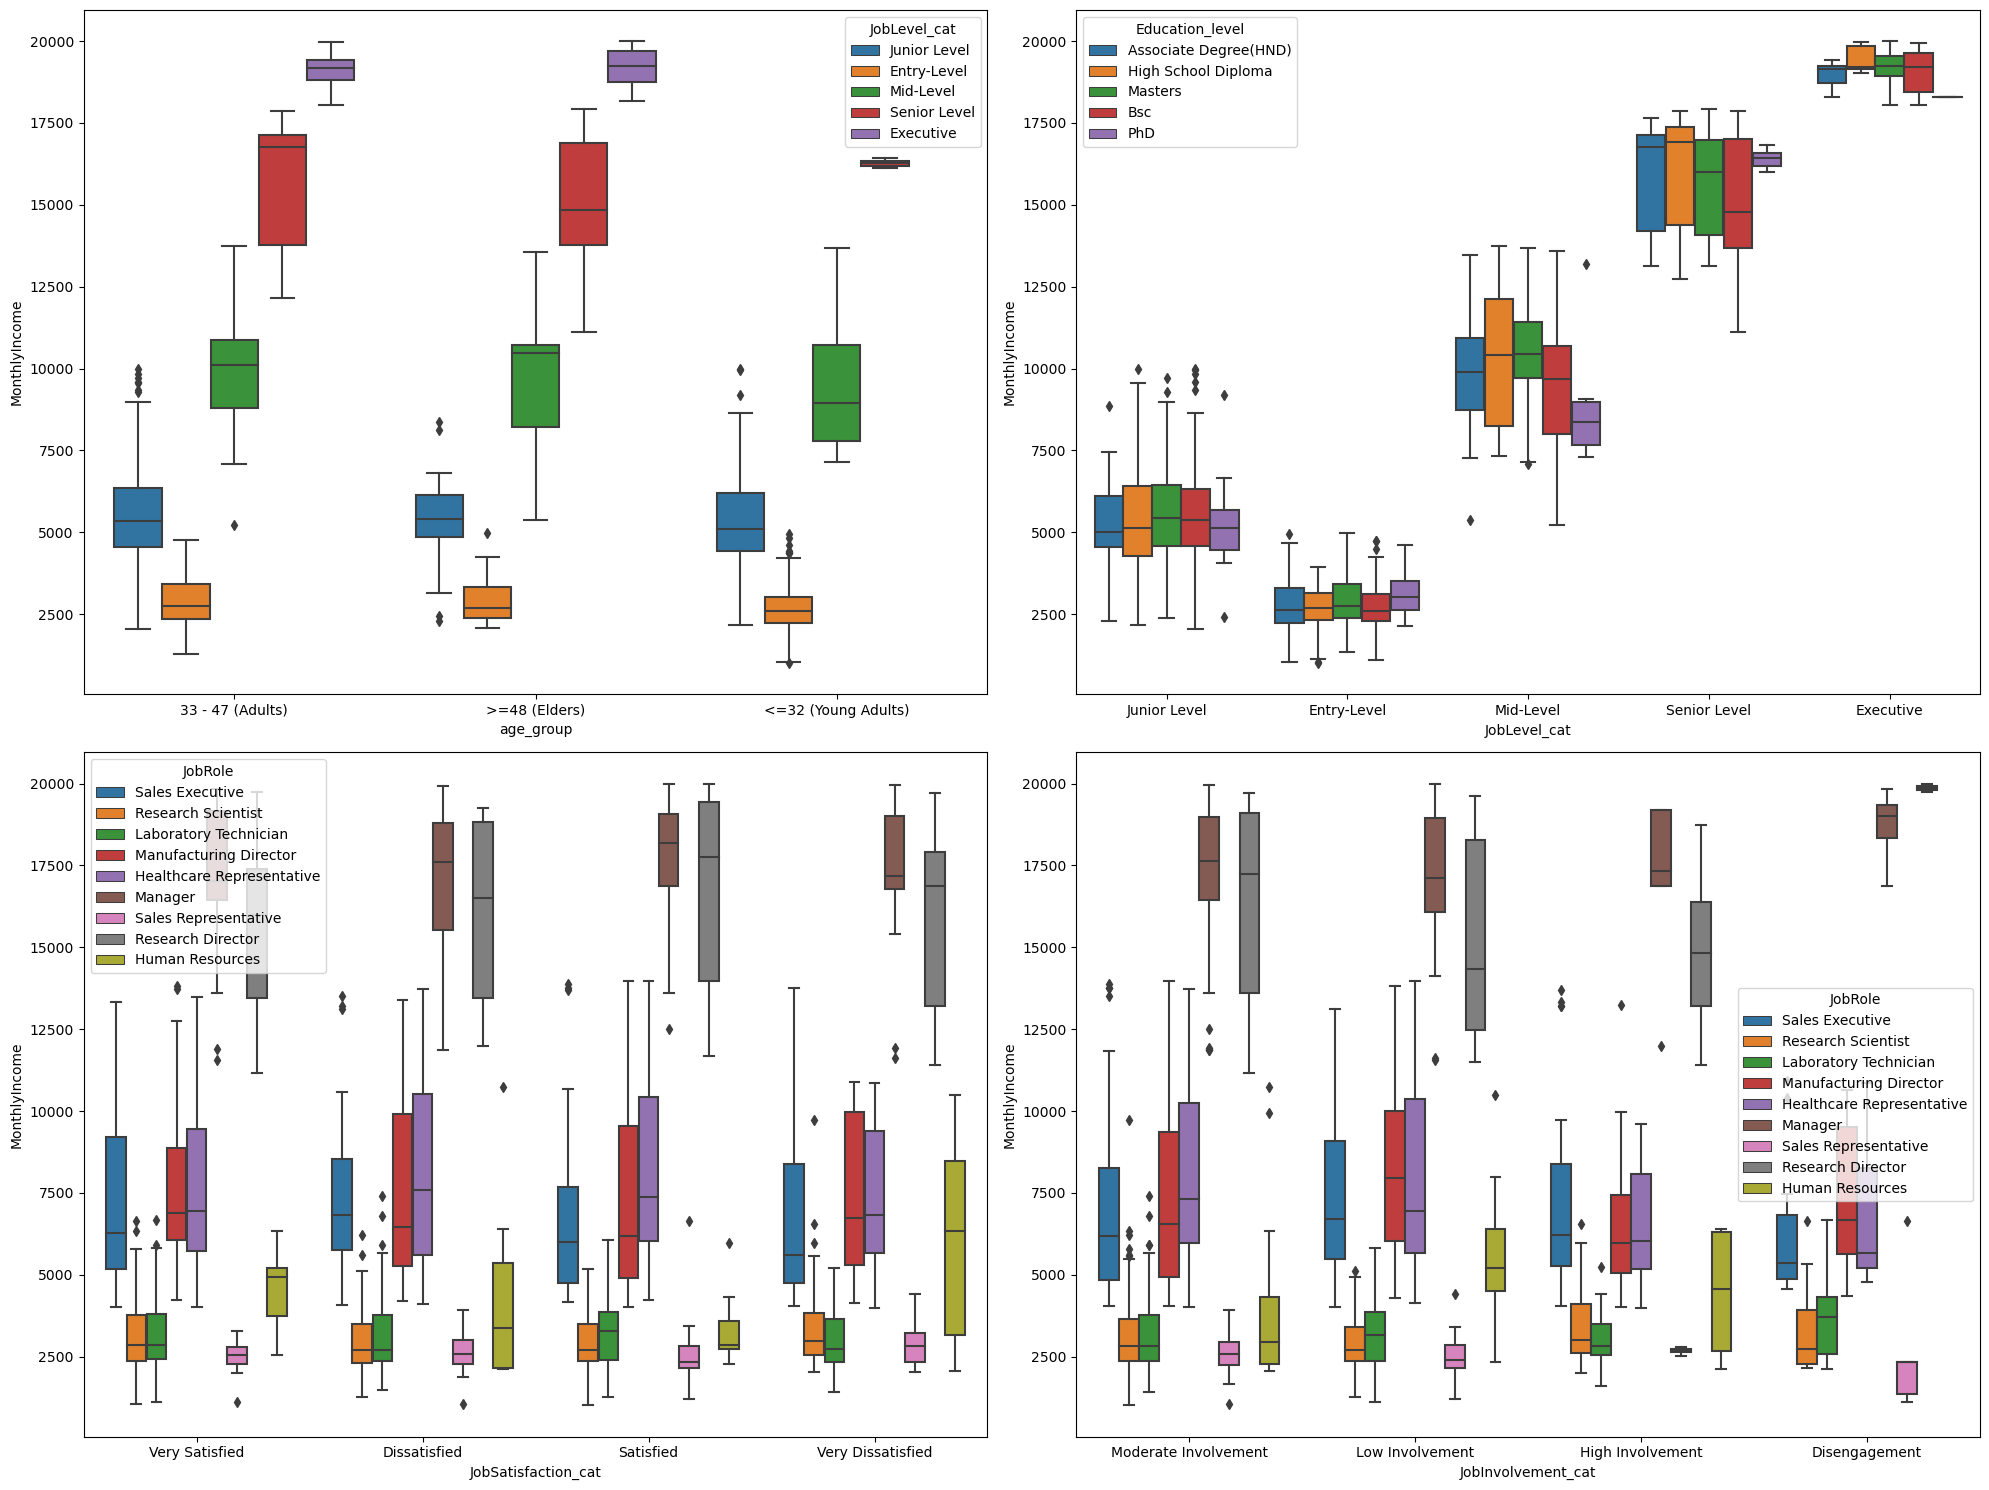

In [35]:
fig, axs = plt.subplots(2,2,figsize=(20,15))

ax = sns.boxplot(x='age_group', y='MonthlyIncome', hue='JobLevel_cat', data=df, ax=axs[0,0])

ax = sns.boxplot(x='JobLevel_cat', y='MonthlyIncome', hue='Education_level', data=df, ax=axs[0,1])

ax = sns.boxplot(x='JobSatisfaction_cat', y='MonthlyIncome', hue='JobRole', data=df, ax=axs[1,0])

ax = sns.boxplot(x='JobInvolvement_cat', y='MonthlyIncome', hue='JobRole', data=df, ax=axs[1,1])

plt.tight_layout()

##### **Observations**
- In all age brackets, the higher your joblevel the higher your salary.
- The higher your joblevel irrespective of your education level, the higher your salary.
- Manager and Research Directors earn the most irrespecteive of their JobSatisfaction Level
- Manager and Research Directors earn the most irrespecteive of their JobInvolvement

In [36]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'age_group', 'Attribution_cat',
       'Education_level', 'Environsatisfaction_cat', 'JobInvolvement_cat',
       'JobLevel_cat', 'PerformanceRating_cat', 'RelationshipSatisfaction_cat',
       'StockOptionLevel_cat', 'JobSatisfaction_cat', 'WorkLifeBalance_cat'],
      dtype='object')

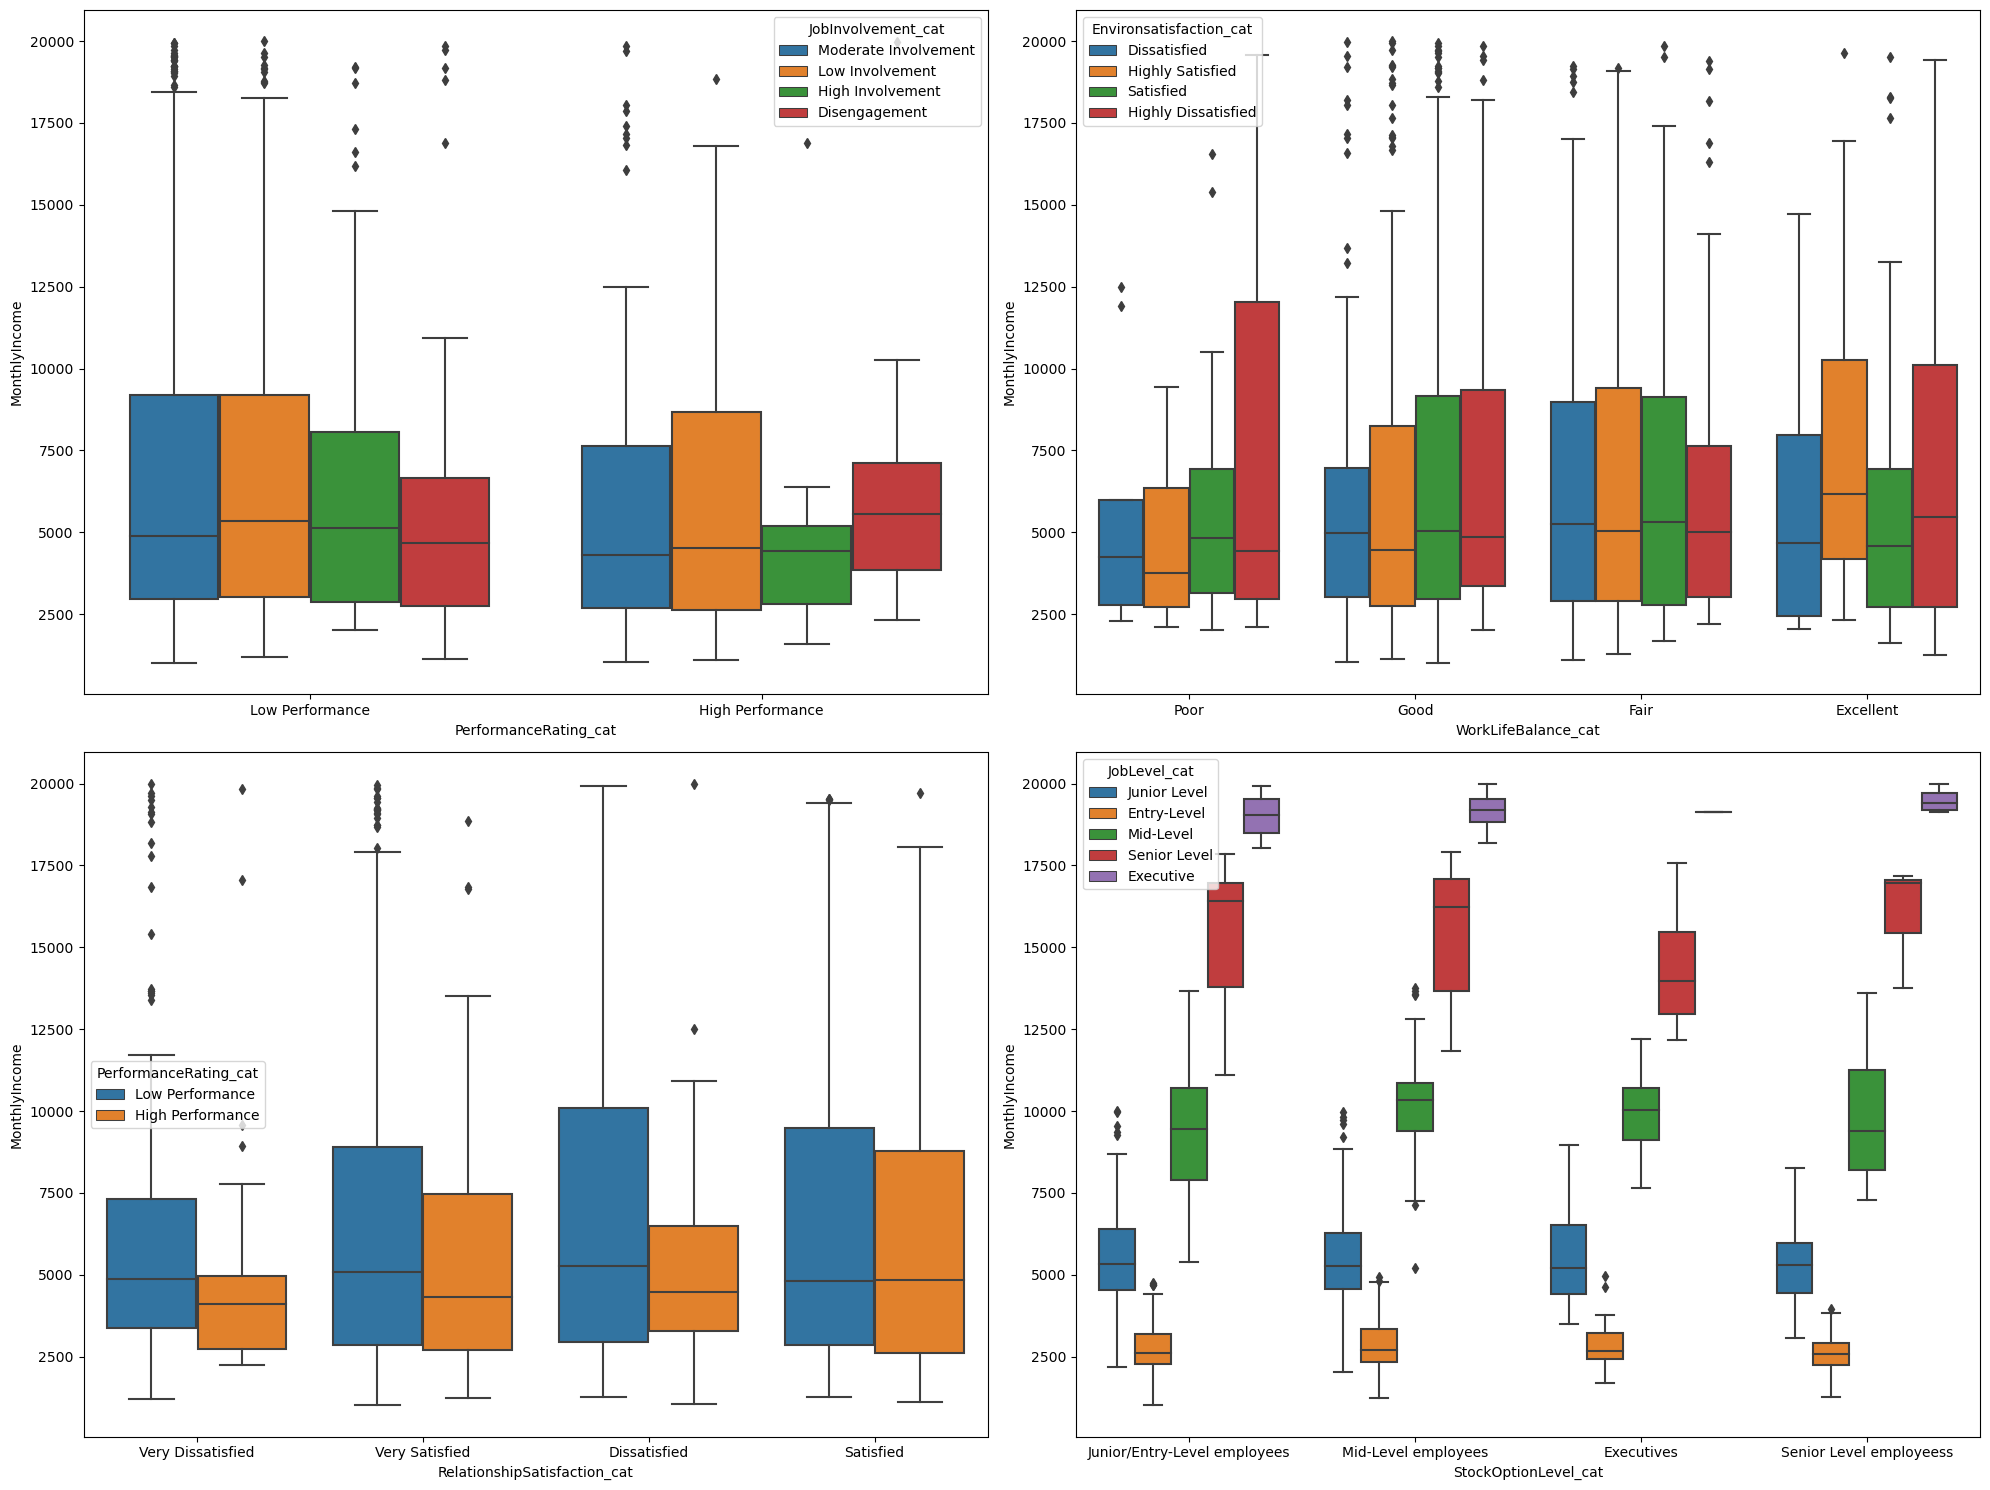

In [37]:
fig, axs = plt.subplots(2,2,figsize=(20,15))

ax = sns.boxplot(x='PerformanceRating_cat', y='MonthlyIncome', hue='JobInvolvement_cat', data=df, ax=axs[0,0])

ax = sns.boxplot(x='WorkLifeBalance_cat', y='MonthlyIncome', hue='Environsatisfaction_cat', data=df, ax=axs[0,1])

ax = sns.boxplot(x='RelationshipSatisfaction_cat', y='MonthlyIncome', hue='PerformanceRating_cat', data=df, ax=axs[1,0])

ax = sns.boxplot(x='StockOptionLevel_cat', y='MonthlyIncome', hue='JobLevel_cat', data=df, ax=axs[1,1])

plt.tight_layout()

##### **Observations**
- For staffs with low performance, those who have disengaged from their jobinvolvement have the lowest MonthlyIncome distribution but have some staffs that are being paid heavily. Those with high involvement are being paid lesser compare to staffs with moderate and low involvement.
- For high performing staffs, those with high involvement in their jobs are paid lesser than the rest.
- For StockOptionLevel, the higher your joblevel the higher your MonthlyIncome

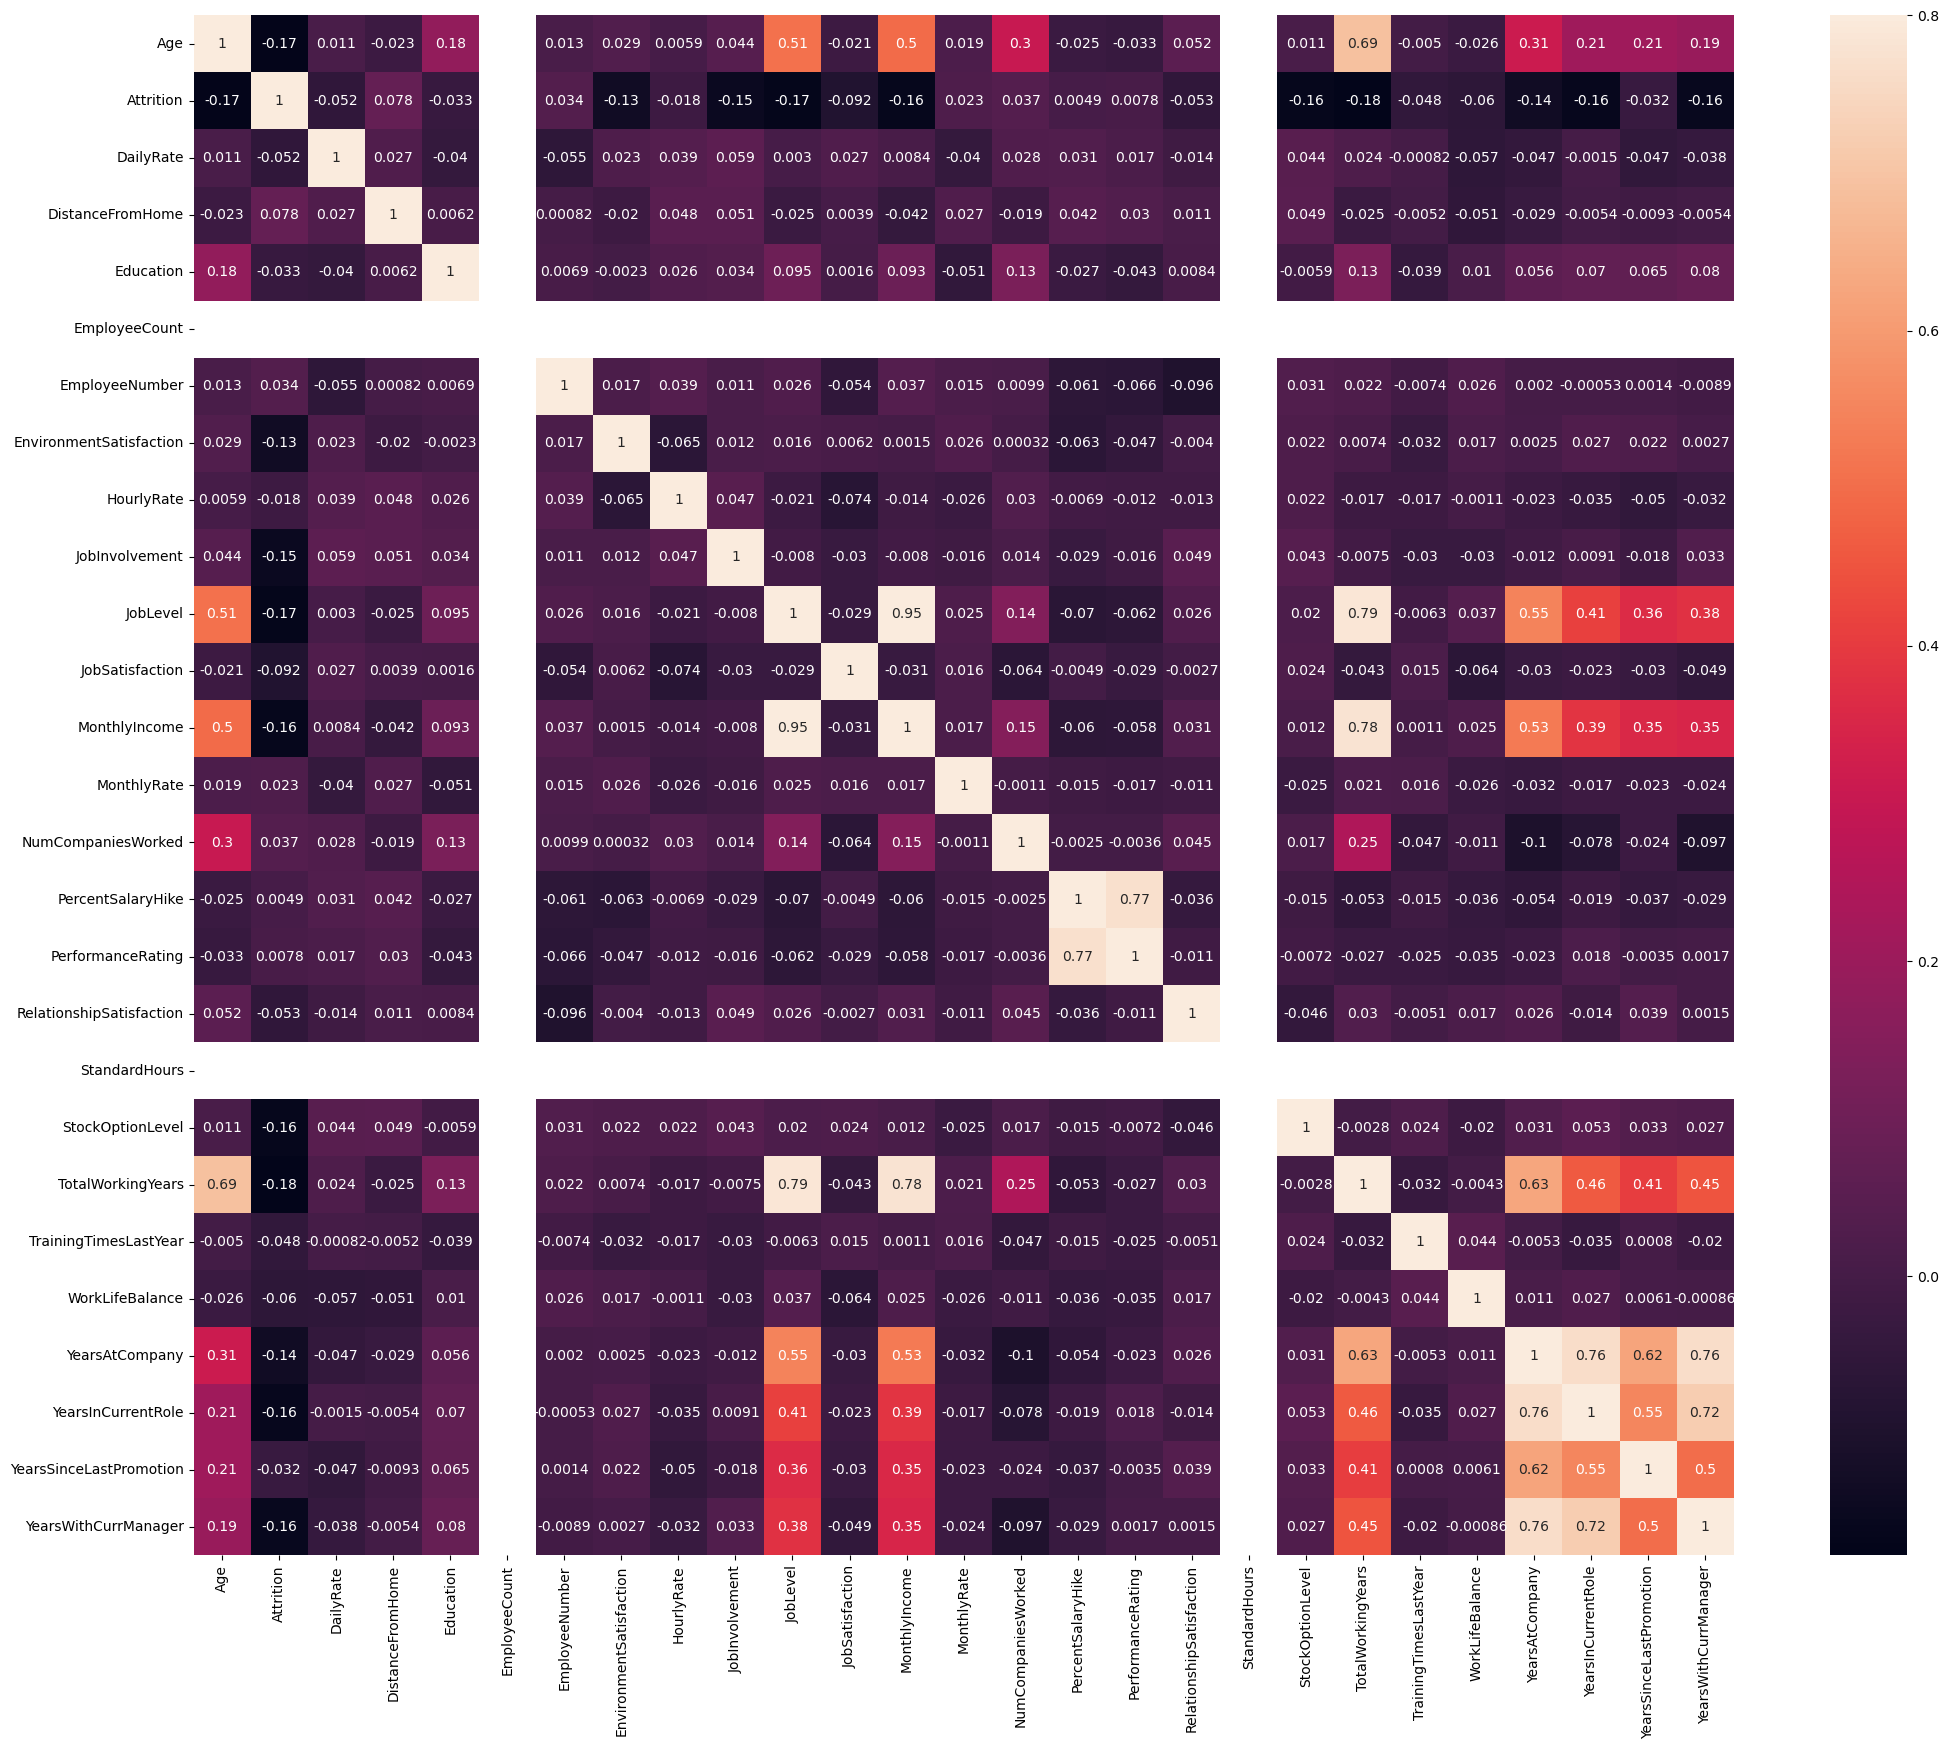

In [38]:
# Correlation between Tearget and some variables in the dataset

numeric_data = df.select_dtypes(include="number")
corr_matrix = numeric_data.corr()
f, ax = plt.subplots(figsize=(25,20))
sns.heatmap(corr_matrix, vmax=.8, square=True, annot=True);

##### **Observations**
- YearsAtCompany, Age both have strong positive correlation with MonthlyIncome.
- NumCompaniesWorked, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager all have weak positive correlation with MonthlyIncome.
- Attribution has weak negative correlation with MonthlyIncome

#### Data Preprocessing
- we have identified data issues like, redundant data that will be dropped
- we will then encode the categorical features in the data
- scale the data set
- plot a feature importances visualiztion, to understand features that may be important predictor features from the dataset

### Phase 1
- Preparing and Processing Data for Modelling
  > data preprocessing,
  > variable encoding,
  > data scaling and normalization

In [39]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'age_group', 'Attribution_cat',
       'Education_level', 'Environsatisfaction_cat', 'JobInvolvement_cat',
       'JobLevel_cat', 'PerformanceRating_cat', 'RelationshipSatisfaction_cat',
       'StockOptionLevel_cat', 'JobSatisfaction_cat', 'WorkLifeBalance_cat'],
      dtype='object')

In [40]:
#dropping off some redundant features

df.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours','age_group','Attribution_cat','Education_level',
         'Environsatisfaction_cat','JobInvolvement_cat','JobLevel_cat','PerformanceRating_cat','RelationshipSatisfaction_cat',
         'StockOptionLevel_cat','JobSatisfaction_cat','WorkLifeBalance_cat'], axis = 1, inplace = True)


# Note: removing this features because it is not in the dataset we are going to make prediction on the MonthlyIncome (i.e testing dataset)
df.drop(['MonthlyRate','Attrition'], axis = 1, inplace = True)


#creating a copy of the dataset for part B
df1 = df.copy()


In [41]:
df1.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [42]:
#encode the categorical features to numerical ones (using the One-Hot Encoding)
df1 = pd.get_dummies(df1, drop_first = True)

df1.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   
3   33       1392                 3          4                        4   
4   27        591                 2          1                        1   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   
3          56               3         1                3           2909  ...   
4          40               3         1                2           3468  ...   

   JobRole_Laboratory Technician  JobRole_Manager  \
0                          False            False   
1                          False            False   
2                           True            False   
3                          False            False   
4                           True            False   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                           False                      False   
1                           False                      False   
2                           False                      False   
3                           False                      False   
4                           False                      False   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                       False                     True   
1                        True                    False   
2                       False                    False   
3                        True                    False   
4                       False                    False   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                         False                  False                  True   
1                         False                   True                 False   
2                         False                  False                  True   
3                         False                   True                 False   
4                         False                   True                 False   

   OverTime_Yes  
0          True  
1         False  
2          True  
3          True  
4         False  

[5 rows x 43 columns]

In [43]:
#segment dataset into data and target label (i.e to remove the target variable(monthly income) from the rest of the dataset)
target = df1.pop('MonthlyIncome')

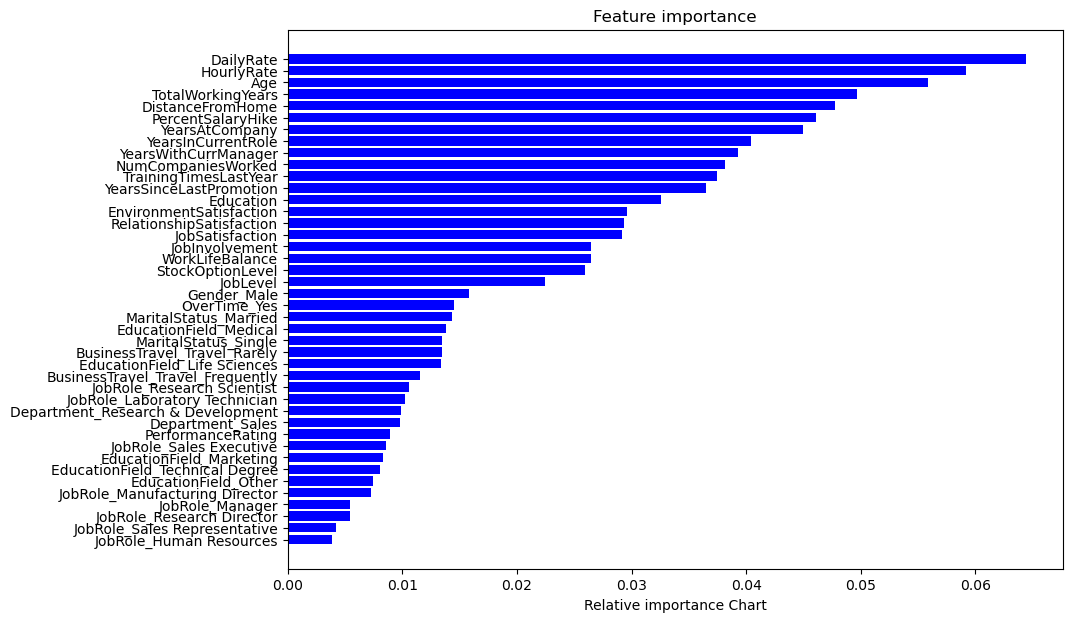

In [44]:
# scale dataset features
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# To Instantiate Scaler object
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df1), columns = df1.columns)      # The scaled dataset
df_scaled


#identifying key feature from the dataset in relation to our target variable (monthly income) using Random Classifier Model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()                       # To Instantiate Model Classifier
model.fit(df_scaled, target)                           # To fit the model ontop of our dataset and target label and model tries to learn the feature important by looking at the Data and the Target label and try to figure out the important features
name_f = list(df1.columns)                             # Names of all the featues (columns)             
importances = model.feature_importances_               # The get the important features 
indices = np.argsort(importances)                      # To sort out importance in ascending order
  


# Plotting a feature importance chart

plt.figure(figsize = (10,7))
plt.barh(range(len(indices)), importances[indices], color = 'blue')
plt.yticks(range(len(indices)), [name_f[i] for i in indices])
plt.xlabel('Relative importance Chart')
plt.title('Feature importance')
plt.show()

In [45]:
df_scaled.head()

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0  0.547619   0.715820          0.000000       0.25                 0.333333   
1  0.738095   0.126700          0.250000       0.00                 0.666667   
2  0.452381   0.909807          0.035714       0.25                 1.000000   
3  0.357143   0.923407          0.071429       0.75                 1.000000   
4  0.214286   0.350036          0.035714       0.00                 0.000000   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  NumCompaniesWorked  \
0    0.914286        0.666667      0.25         1.000000            0.888889   
1    0.442857        0.333333      0.25         0.333333            0.111111   
2    0.885714        0.333333      0.00         0.666667            0.666667   
3    0.371429        0.666667      0.00         0.666667            0.111111   
4    0.142857        0.666667      0.00         0.333333            1.000000   

   ...  JobRole_Laboratory Technician  JobRole_Manager  \
0  ...                            0.0              0.0   
1  ...                            0.0              0.0   
2  ...                            1.0              0.0   
3  ...                            0.0              0.0   
4  ...                            1.0              0.0   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      1.0   
1                         1.0                      0.0   
2                         0.0                      0.0   
3                         1.0                      0.0   
4                         0.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Married  MaritalStatus_Single  \
0                           0.0                    0.0                   1.0   
1                           0.0                    1.0                   0.0   
2                           0.0                    0.0                   1.0   
3                           0.0                    1.0                   0.0   
4                           0.0                    1.0                   0.0   

   OverTime_Yes  
0           1.0  
1           0.0  
2           1.0  
3           1.0  
4           0.0  

[5 rows x 42 columns]

### Phase 2
- Splitting data into training and evaluation datasets
- Implementing Machine Learning/model Building and Training
- creating a predictions file

In [46]:
# importing predictive regression models

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
# split the DataFrame into train and test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size = 0.2, random_state = 42)


In [48]:
#X_train.head()

In [49]:
#y_train.head()

In [50]:
#X_test.head()

In [51]:
#y_test.head()

### 1. Linear Regression

In [52]:
# Fit a linear regression model on the training set

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Phase 3
- **we will compute the model's r_squared score (r2_score) which is a measure of how "good afit" the linear model is for modelling this kind of data**
- **here we will use business metrics such as the mean squared error(mse) and the root mean squared error (rsme) model Evaluation
to evaluate the linear regression's model's performance**
- we'ill also visualize the plot of the model's predicted label  vs the actual label

In [53]:
#Import evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = lr.predict(X_test)

# Evaluate the model using the test data
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error( y_test, y_pred)
rmse = np.sqrt(mse)

print("Linear Regression")
print(f"R-Squared score {r2}")
print(f"Mean square score {mse}")
print(f"RMSE score {rmse}")

Linear Regression
R-Squared score 0.9443003192851899
Mean square score 1173725.462737948
RMSE score 1083.3861097217132


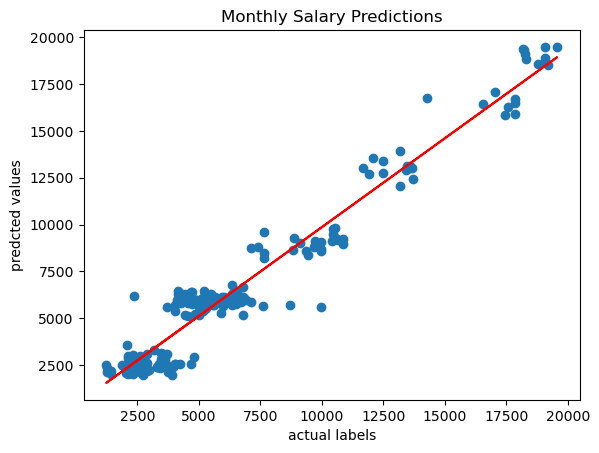

In [54]:
# Plot predicted vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('actual labels')
plt.ylabel('predcted values')
plt.title('Monthly Salary Predictions')

# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = "red")
plt.show()

##### **Observations**
- This positive linear relationship shows that this particular model is good for modellig this particular problem.
- it also shows that the predicted values is not far off from the actual labels

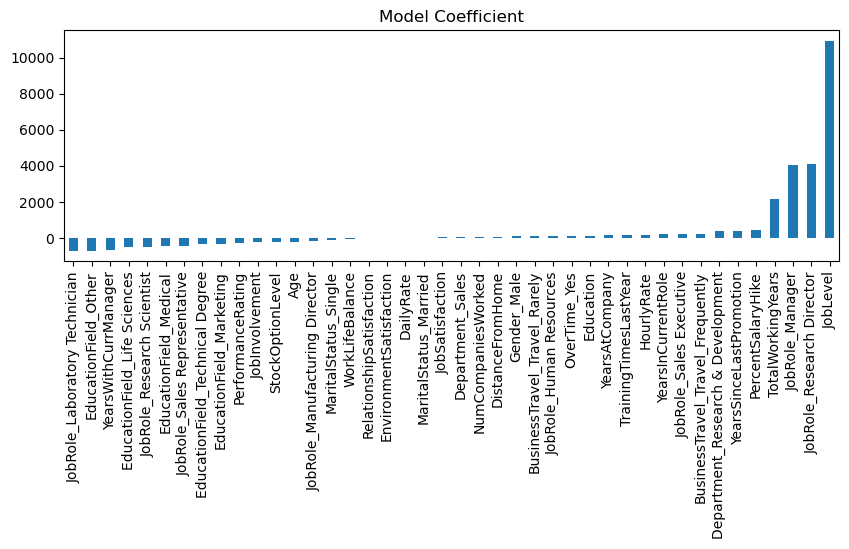

In [55]:
# Visualizing model coefficients
from pandas import Series

plt.figure(figsize = (10,3))

predictors = X_train.columns
coef = Series(lr.coef_, predictors).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficient');

#####  Observation
The model coefficiet shows the importance of each features in predicting the salary an employee will receive

From the above diagram, we can see the the Top five and bottom five featues that has the most impact in determining (predicting) the salary of an employee

They are (Top five):                                    
1. JobLevel
2. JobRole_Research Director
3. JobRole_Manager
4. TotalWorkingYears
5. PercentageSalaryHike


Bottom Five:
1. EducationalField_Other
2. JobRole_Labouratory Technician
3. YearsWithCurrManager
4. EducationalField_Life Sciences
5. JobRole_Research Scientist

### 2. DecisionTreeRegressor

In [56]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [57]:
dtr_pred = dtr.predict(X_test)

# Evaluate the model using the test data
r2 = r2_score(y_test, dtr_pred)
mse = mean_squared_error( y_test, dtr_pred)
rmse = np.sqrt(mse)

print("Linear Regression")
print(f"R-Squared score {r2}")
print(f"Mean square score {mse}")
print(f"RMSE score {rmse}")

Linear Regression
R-Squared score 0.9196418764950371
Mean square score 1693337.816037736
RMSE score 1301.2831421476787


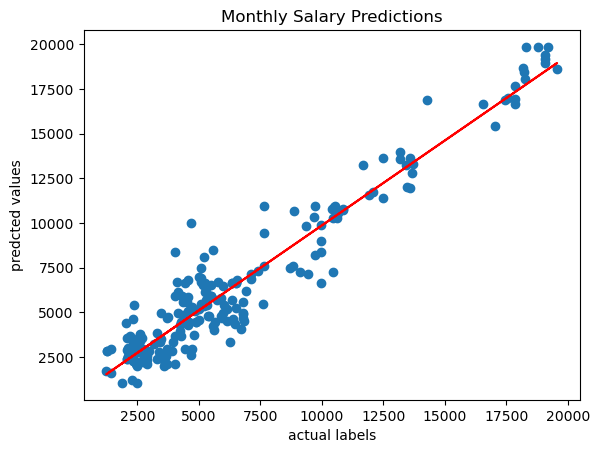

In [58]:
# Plot predicted vs actual
plt.scatter(y_test, dtr_pred)
plt.xlabel('actual labels')
plt.ylabel('predcted values')
plt.title('Monthly Salary Predictions')

# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = "red")
plt.show()

### 3. SVR

In [59]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [60]:
svr_pred = svr.predict(X_test)

# Evaluate the model using the test data
r2 = r2_score(y_test, svr_pred)
mse = mean_squared_error( y_test, svr_pred)
rmse = np.sqrt(mse)

print("Linear Regression")
print(f"R-Squared score {r2}")
print(f"Mean square score {mse}")
print(f"RMSE score {rmse}")

Linear Regression
R-Squared score -0.13841599966959572
Mean square score 23989147.31382289
RMSE score 4897.871712675097


### 4. GradientBoostingRegressor

In [61]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [62]:
gb_pred = gb.predict(X_test)

# Evaluate the model using the test data
r2 = r2_score(y_test, gb_pred)
mse = mean_squared_error( y_test, gb_pred)
rmse = np.sqrt(mse)

print("Linear Regression")
print(f"R-Squared score {r2}")
print(f"Mean square score {mse}")
print(f"RMSE score {rmse}")

Linear Regression
R-Squared score 0.9554621275174435
Mean square score 938519.4729680519
RMSE score 968.7721470851915


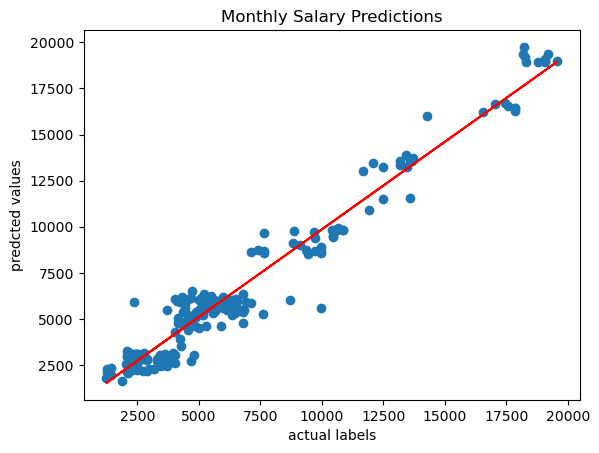

In [63]:
# Plot predicted vs actual
plt.scatter(y_test, gb_pred)
plt.xlabel('actual labels')
plt.ylabel('predcted values')
plt.title('Monthly Salary Predictions')

# overlay the regression line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = "red")
plt.show()

### Phase 3 Hyper Parameter 0ptimization
- hyperparameter optimization is the art and science of improving our model's performances
- we will be  implementing and optimizing a GradientBoostingRegressor model

In [64]:
# Use a Gradient Boosting algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
          'learning_rate':  [0.1,0.5,1.0], 
          'n_estimators': [50,100,150]
}

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring = score, cv = 3)
gridsearch.fit(X_train, y_train)
print(f'Best Parameter combination{gridsearch.best_params_}')

# measuring performance on test set
print(f'Applying best model on test data')
best_mod = gridsearch.best_estimator_
alg_pred = best_mod.predict(X_test)

Best Parameter combination{'learning_rate': 0.1, 'n_estimators': 50}
Applying best model on test data


In [65]:
#creating a prediction file

#alg_pred

In [66]:
# Evaluate the model using the test data

r21 = r2_score(y_test, alg_pred)
mse1 = mean_squared_error( y_test  , alg_pred)
rmse1 = np.sqrt(mse1)

print("Linear Regression")
print(f"R-Squared score {r21}")
print(f"Mean square score {mse1}")
print(f"RMSE score {rmse1}")

Linear Regression
R-Squared score 0.956633107676659
Mean square score 913844.1209445925
RMSE score 955.951944892939


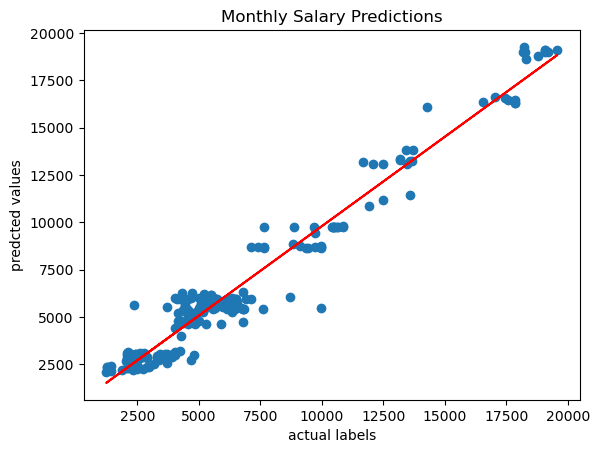

In [67]:
# Plot predicted vs actual

plt.scatter(y_test, alg_pred)
plt.xlabel('actual labels')
plt.ylabel('predcted values')
plt.title('Monthly Salary Predictions')

# overlay the regression line
z = np.polyfit(y_test, alg_pred, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color = "red")
plt.show()


**Observations**
we can see an improved performance through the optimized gradient boosting model, with an r squared score of 0.96, which is better than the linear regression's model. we will sumbit this as our best performing model and productionize it

In [68]:
#testing.info()

In [69]:
#scaled_df.info()

### Productionizing Our Model (Model Deployment)
this is the last stage of the machine learning pipeline, and the main aim here points to how the users use/consume the model.
there are alot of ways an ML Model can be used
- it can be embedded into an application to be used by users online via an API on  web interfaces or on mobile devices
- It can be used to create reports or dashboards that will be used by the organisation in making key business decisions
- it can be consumed via streaming or batch methods

**In this case scenario, we will simulate the use of the model on a new dataset and use it to make relevant predictions**

In [70]:
testing_data = pd.read_excel(r"C:\Users\Abdulwahab\Desktop\Data Science Course\WEEK 11 Materials\LIVE CLASS\test.xlsx")
testing_data.head()

Age     BusinessTravel  DailyRate              Department  \
0   34      Travel_Rarely        790                   Sales   
1   35      Travel_Rarely        660                   Sales   
2   24  Travel_Frequently        381  Research & Development   
3   24         Non-Travel        830                   Sales   
4   44  Travel_Frequently       1193  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                24          4        Medical              1            1489   
1                 7          1  Life Sciences              1            1492   
2                 9          3        Medical              1            1494   
3                13          2  Life Sciences              1            1495   
4                 2          1        Medical              1            1496   

   EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                        1  ...                        3             80   
1                        4  ...                        1             80   
2                        2  ...                        3             80   
3                        4  ...                        3             80   
4                        2  ...                        2             80   

   StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  WorkLifeBalance  \
0                 0                 16                     2                4   
1                 1                  1                     3                3   
2                 0                  4                     2                2   
3                 1                  1                     2                3   
4                 0                 16                     2                2   

  YearsAtCompany  YearsInCurrentRole YearsSinceLastPromotion  \
0             15                   9                      10   
1              1                   0                       0   
2              0                   0                       0   
3              1                   0                       0   
4              2                   2                       2   

  YearsWithCurrManager  
0                   10  
1                    0  
2                    0  
3                    0  
4                    2  

[5 rows x 32 columns]

In [71]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       412 non-null    int64 
 1   BusinessTravel            412 non-null    object
 2   DailyRate                 412 non-null    int64 
 3   Department                412 non-null    object
 4   DistanceFromHome          412 non-null    int64 
 5   Education                 412 non-null    int64 
 6   EducationField            412 non-null    object
 7   EmployeeCount             412 non-null    int64 
 8   EmployeeNumber            412 non-null    int64 
 9   EnvironmentSatisfaction   412 non-null    int64 
 10  Gender                    412 non-null    object
 11  HourlyRate                412 non-null    int64 
 12  JobInvolvement            412 non-null    int64 
 13  JobLevel                  412 non-null    int64 
 14  JobRole                   

In [72]:
#Productionizing the best performing model
# Serializing the best model for subsequent and easy usage
import joblib

# Save the model as a pickle file
filename = './optimized_mod.pkl'
joblib.dump(best_mod, filename)


['./optimized_mod.pkl']

**Now to stimulate a typical production environment, we will use the test data set( the other data set in the data folder) as the new employeedata set to
predict**

In [73]:
# Apply transforms to the new data similar to the training dataset

#dropping off some redundant features
testing_data.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'], axis = 1, inplace = True)

#encode the categorical features to numerical ones (using the One-Hot Encoding)
testing_data = pd.get_dummies(testing_data, drop_first = True)

In [74]:
#testing_data

In [75]:
# Inference - we are usig the est performing model to predict the monthlyincome o the new dataset
prediction = best_mod.predict(testing_data)
testing_data['Predicted_MonthlyIcome'] = prediction

In [78]:
testing_data

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0     34        790                24          4                        1   
1     35        660                 7          1                        4   
2     24        381                 9          3                        2   
3     24        830                13          2                        4   
4     44       1193                 2          1                        2   
..   ...        ...               ...        ...                      ...   
407   36        884                23          2                        3   
408   39        613                 6          1                        4   
409   27        155                 4          3                        2   
410   49       1023                 2          3                        4   
411   34        628                 8          3                        2   

     HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  \
0            40               2         2                2   
1            76               3         1                3   
2            89               3         1                1   
3            78               3         1                2   
4            86               3         3                3   
..          ...             ...       ...              ...   
407          41               4         2                4   
408          42               2         3                1   
409          87               4         2                2   
410          63               2         2                2   
411          82               4         2                3   

     NumCompaniesWorked  ...  JobRole_Manager  JobRole_Manufacturing Director  \
0                     0  ...            False                           False   
1                     1  ...            False                           False   
2                     2  ...            False                           False   
3                     1  ...            False                           False   
4                     5  ...            False                            True   
..                  ...  ...              ...                             ...   
407                   4  ...            False                           False   
408                   4  ...            False                           False   
409                   1  ...            False                            True   
410                   2  ...            False                           False   
411                   2  ...            False                           False   

     JobRole_Research Director  JobRole_Research Scientist  \
0                        False                       False   
1                        False                       False   
2                        False                       False   
3                        False                       False   
4                        False                       False   
..                         ...                         ...   
407                      False                       False   
408                      False                       False   
409                      False                       False   
410                      False                       False   
411                      False                       False   

     JobRole_Sales Executive  JobRole_Sales Representative  \
0                       True                         False   
1                      False                          True   
2                      False                         False   
3                      False                          True   
4                      False                         False   
..                       ...                           ...   
407                    False                         False   
408                    False                         False   
409                    False                         False 

##### Conclusion
This project aims to provide a robust predictive model that accurately estimates employee salaries based on various factors, including education level, attributions, and other relevant features. By identifying and analyzing the key determinants of salary, the project will offer valuable insights into the relationship between employee characteristics and compensation. These insights can aid HR professionals in making data-driven decisions related to compensation strategies, employee retention, and talent management, ultimately contributing to a more informed and equitable workplace.